# Marketing Campaign Project

### Problem Scenario: ‘Marketing mix’ is a popular concept used in implementing marketing strategies. A marketing mix includes multiple areas of focus as part of a comprehensive marketing plan. This all revolves around the four Ps of marketing - product, price, place, and promotion.

### Problem Objective: We'll perform exploratory data analysis and hypothesis testing. The goal is to gain a better understanding of the various factors that contribute to customer acquisition.

### We'll test the following hypotheses:

- Older people are not as tech-savvy and probably prefer shopping in-store.
- Customers with kids probably have less time to visit a store and would prefer to shop online.
- Other distribution channels may cannibalize sales at the store.
- Does the US fare significantly better than the rest of the world in terms of total purchases?

### We'll use appropriate visualizations to help analyze the following:

- Which products are performing the best, and which are performing the least in terms of revenue?
- Is there any pattern between the age of customers and the last campaign acceptance rate?
- Which Country has the greatest number of customers who accepted the last campaign?
- Is there any pattern in the no. of children at home and total spend?
- Education background of the customers who complained in the last 2 years.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, gaussian_kde, binom, poisson,norm,uniform

## We will first create a data frame from the csv containing the data

In [85]:
mdata = pd.read_csv('marketing_data.csv') # Create dataframe from csv file
print(mdata.head(10)) # print first 10 rows of the dataframe
print(mdata.columns)  # print column names

      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   
5   7348        1958         PhD         Single  $71,691.00         0   
6   4073        1954    2n Cycle        Married  $63,564.00         0   
7   1991        1967  Graduation       Together  $44,931.00         0   
8   4047        1954         PhD        Married  $65,324.00         0   
9   9477        1954         PhD        Married  $65,324.00         0   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...         

## Then we'll ensure that the data is clean and that there is no missing or incorrect data
## Inspecting the data manually by looking at the csv file we can see that sthe Income colum has some cells empty

In [86]:
mdata.info() # print information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### We can see from the info method that the 'Income' column has only 2216 non-null count. 
### Since the dataframe contains 2240 rows, the 'Income' column is missing 22 entries
### We'll do further exploration of each column to detect any issues with the data in those columns
### This is the strategy for checking validity of the data:
- We will check to make sure there are no duplicate rows
- We need to make sure that information that needs to be unique has no duplicates i.e. Customer ID
- For Year of Birth we'll make sure that the number entered is a valid year (not in the future or 0 or too far into the past)
- We'll create an 'AGE' column to make analysis easier
- For Education, Marital Status,  we'll make sure all entries correspond to a logical category
- For income we know we are missing data
- Dt_Customer, we'll mke sure we've got valid dates
- For Country we'll get a list of all unique values
- For the rest of the numerical columns we'll get list of unique values

In [87]:
# Check for duplicates
duplicate_rows = mdata[mdata.duplicated()]
if duplicate_rows.empty:
    print('No duplicate rows found')
else:
    print(duplicate_rows)
    
print()

# Check for duplicate IDs
duplicate_ids = mdata[mdata['ID'].duplicated()]
if duplicate_ids.empty:
    print('No duplicate IDs found')
else:
    print(duplicate_ids)
    
print()


# Check unique values for Year of Birth
print("These are the unique values for Year of Birth")
print(mdata['Year_Birth'].unique())

print()

# Add new column for Age to the original dataset
mdata['Age'] = pd.to_datetime(mdata['Dt_Customer'],format="%m/%d/%y").dt.year - mdata['Year_Birth']

# Check Year of Birth outliers
outliers = mdata[mdata['Age'] > 100]
print('These are the Age outliers in the dataset')
print(outliers)
print()


# Check unique values for Education
print(mdata['Education'].value_counts())

print()

# Check unique values for Marital Status
print(mdata['Marital_Status'].value_counts())

print()

# Check the outlier marital status categories of 'Absurd', 'Yolo' and 'Alone'
outlier_marital_status = mdata[(mdata['Marital_Status'] == 'Absurd') | (mdata['Marital_Status'] == 'YOLO') | (mdata['Marital_Status'] == 'Alone')]
# outlier marita status ages
print('These are the Marital status outliers in the dataset')
print(outlier_marital_status)
print()


#Check missing values
print('Columns with Count of Missing values')
print(mdata.isnull().sum())
print()
# Print rows with missing values
missing_income_rows = mdata[mdata[' Income '].isnull()]
print('Rows with missing Income values')
print(mdata[mdata.isnull().any(axis=1)])
print()

#Check Country Unique values
print(mdata['Country'].value_counts())
print()

# Check kidhom and all other numerical columns for valid values
print('Minimum and Maximum values for all numerical columns')
unique_values_in_numerical_columns = {col:set() for col in mdata.select_dtypes(include=[np.number]).columns}
for index,row in mdata.iterrows():
    for col in unique_values_in_numerical_columns:
        unique_values_in_numerical_columns[col].add(row[col])
        
#print unique values in numerical columns except ID
for col in unique_values_in_numerical_columns:
    if col != 'ID':
        print(f'{col}: Min-Max: {min(unique_values_in_numerical_columns[col])} - {max(unique_values_in_numerical_columns[col])}')
        print()
        


No duplicate rows found

No duplicate IDs found

These are the unique values for Year of Birth
[1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1893 1996 1995 1899 1943
 1941 1940 1900]

These are the Age outliers in the dataset
         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
513   11004        1893  2n Cycle         Single  $60,182.00         0   
827    1150        1899       PhD       Together  $83,532.00         0   
2233   7829        1900  2n Cycle       Divorced  $36,640.00         1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
513          1     5/17/14       23         8  ...                  4   
827          0     9/26/13       36       755  ...                  1   
2233         0     9/26/13       99        15

## Given the data exploration above we have identified the following issues:

- There are 7 rows with marital status categories that are not valid categories, i.e. "YOLO", "Alone", "Absurd"
- There are 3 rows with a Birth Year of 1900 or less, making their ages over 110 years of age
- There are 24 rows with missing income
- We will need to look at income outliers which might be causing skeweness

## Suggested Resolution of these issues:

- For Marital status, since in this project, marital status is not factoring into any of our proposed hypotheses, we will leave them as they are
- For the Birth Year issue, we'll run multiple scenarios to see how it affects our conclusions: 1. deleting the 3 rows, 2. imputating the data by using median age, 3. using 1st quartile mean age 4. using 3rd quartile mean age 5. assigning to each outlier the mean age of the income quartile in which the income of the outlier falls
- For the 24 rows of missing income, we'll imputate the missing values by looking at education and marital status and assume that the customers with similar education and marital status make the same yearly income, on average.

# AGE outlier resolution Exploration

## Birth Year mean without any modifications to original dataset

count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age Distribution')

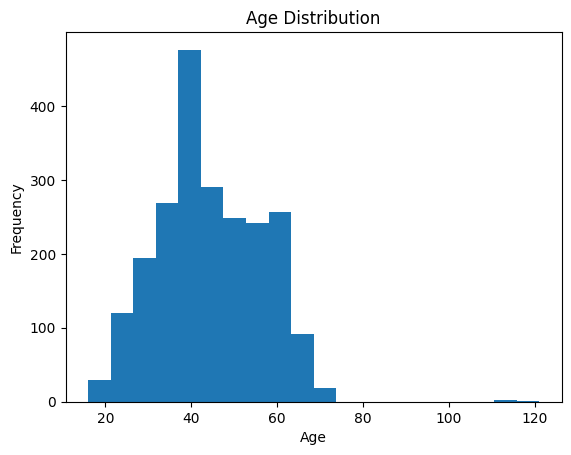

In [88]:
print(mdata['Age'].describe())
mdata['Age'].plot(kind='hist',bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

## Birth Year Removal of Outliers

count    2237.000000
mean       44.126062
std        11.739008
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age Distribution')

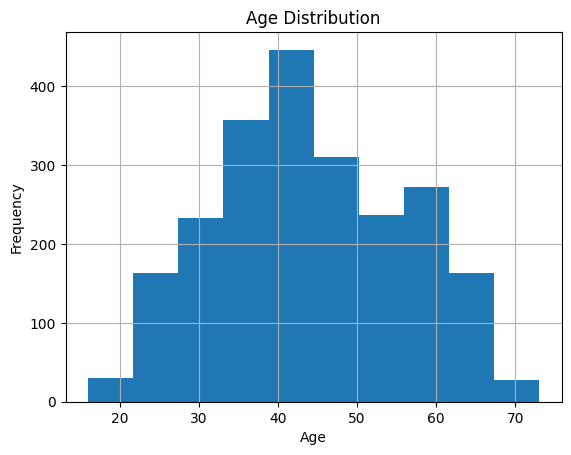

In [89]:
mdata_no_age_outliers = mdata.copy()
mdata_no_age_outliers = mdata[mdata['Age'] <= 100]
print(mdata_no_age_outliers['Age'].describe())
mdata_no_age_outliers['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

## Birth Year Imputations - using mean age

count    2240.000000
mean       44.125893
std        11.731142
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age Distribution')

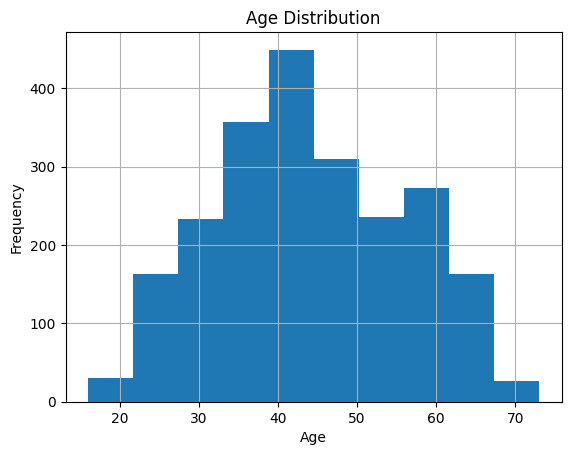

In [90]:
mdata_age_outliers_to_mean = mdata.copy()
mdata_age_outliers_to_mean.loc[mdata_age_outliers_to_mean['Age'] > 100, 'Age'] = int(mdata['Age'].mean())
print(mdata_age_outliers_to_mean['Age'].describe())
mdata_age_outliers_to_mean['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')


## Birth Year Imputations - using 1st quartile mean age

count    2240.000000
mean       44.115179
std        11.734907
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age Distribution')

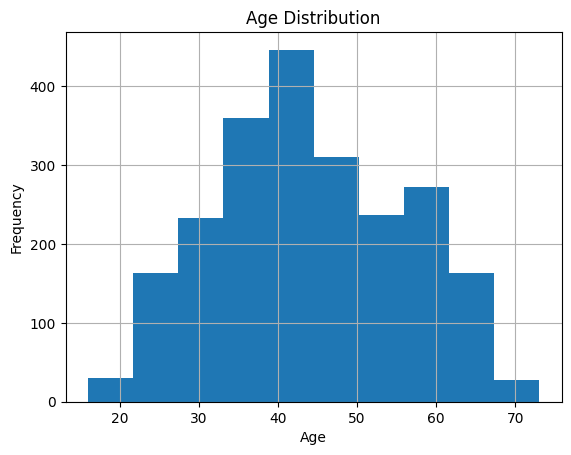

In [91]:
mdata_age_outliers_to_1st_quartile = mdata.copy()
mdata_age_outliers_to_1st_quartile.loc[mdata_age_outliers_to_1st_quartile['Age'] > 100, 'Age'] = int(mdata['Age'].quantile(0.25))
print(mdata_age_outliers_to_1st_quartile['Age'].describe())
mdata_age_outliers_to_1st_quartile['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

## Birth Year Imputations  - using 3rd quartile mean age

count    2240.000000
mean       44.139286
std        11.736700
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age Distribution')

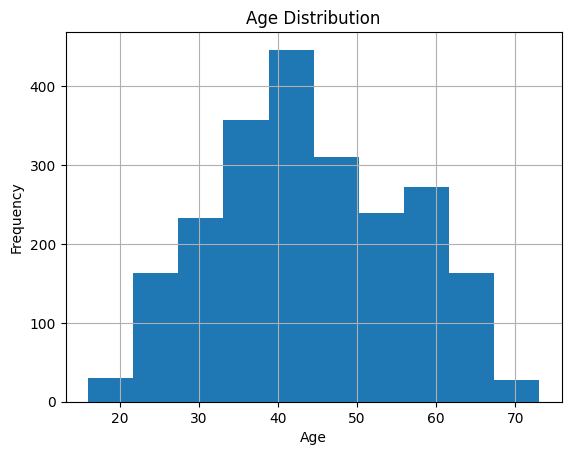

In [92]:
mdata_age_outliers_to_3rd_quartile = mdata.copy()
mdata_age_outliers_to_3rd_quartile.loc[mdata_age_outliers_to_3rd_quartile['Age'] > 100, 'Age'] = int(mdata['Age'].quantile(0.75))
print(mdata_age_outliers_to_3rd_quartile['Age'].describe())
mdata_age_outliers_to_3rd_quartile['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

## Using the mean age of the income quartile mean that comes closest to the income for each of the 3 age outliers

In [93]:

# Change income to float, can only be run once
mdata[' Income ']=mdata[' Income '].str.replace('$','').str.replace(',','').astype(float) 

# Replace missing values with 0
mdata[' Income '] = mdata[' Income '].fillna(0)

# Calcualte the quartiles for income
quartiles = mdata[' Income '].quantile([0.25,0.5,0.75])
print(quartiles)
print(mdata[' Income '].info())
print()
print(outliers)

# Calculate the mean income for each quartile
mean_income_1st_quartile = mdata[mdata[' Income '] <= quartiles[0.25]][' Income '].mean()
mean_income_2nd_quartile = mdata[(mdata[' Income '] > quartiles[0.25]) & (mdata[' Income '] <= quartiles[0.5])][' Income '].mean()
mean_income_3rd_quartile = mdata[(mdata[' Income '] > quartiles[0.5]) & (mdata[' Income '] <= quartiles[0.75])][' Income '].mean()
mean_income_4th_quartile = mdata[mdata[' Income '] > quartiles[0.75]][' Income '].mean()

# Store the means in a dictionary
quartile_means = {'q1':mean_income_1st_quartile, 'q2':mean_income_2nd_quartile, 'q3':mean_income_3rd_quartile, 'q4':mean_income_4th_quartile}

#Function to find closest quartile baed on income
def closest_quartile(income,quartile_means):
    closest_q = min(quartile_means, key=lambda x:abs(quartile_means[x]-income))
    return closest_q

# Itaration over age outliers and assign to closest quartile
for index, row in mdata[mdata['Age']>100].iterrows():
    income=row[' Income ']
    closest_q=closest_quartile(income,quartile_means)
    
    if closest_q == 'q1':
        mdata.at[index, 'Age']=int(mdata[mdata[' Income '] <= quartiles[0.25]]['Age'].mean())
    elif closest_q == 'q2':
        mdata.at[index, 'Age']=int(mdata[(mdata[' Income '] > quartiles[0.25]) & (mdata[' Income '] <= quartiles[0.5])]['Age'].mean())
    elif closest_q == 'q3':
        mdata.at[index, 'Age']=int(mdata[(mdata[' Income '] > quartiles[0.5]) & (mdata[' Income '] <= quartiles[0.75])]['Age'].mean())
    elif closest_q == 'q4':
        mdata.at[index, 'Age']=int(mdata[mdata[' Income '] > quartiles[0.75]]['Age'].mean())
    
    #print(mdata.loc[index])
    print()
print(mdata['Age'].describe())
    

0.25    34722.00
0.50    51075.00
0.75    68289.75
Name:  Income , dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name:  Income 
Non-Null Count  Dtype  
--------------  -----  
2240 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB
None

         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
513   11004        1893  2n Cycle         Single  $60,182.00         0   
827    1150        1899       PhD       Together  $83,532.00         0   
2233   7829        1900  2n Cycle       Divorced  $36,640.00         1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
513          1     5/17/14       23         8  ...                  4   
827          0     9/26/13       36       755  ...                  1   
2233         0     9/26/13       99        15  ...                  5   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
513              0             0     

count    2240.000000
mean       44.127679
std        11.731313
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64

         ID  Year_Birth Education Marital_Status   Income   Kidhome  Teenhome  \
513   11004        1893  2n Cycle         Single   60182.0        0         1   
827    1150        1899       PhD       Together   83532.0        0         0   
2233   7829        1900  2n Cycle       Divorced   36640.0        1         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
513      5/17/14       23         8  ...                  4             0   
827      9/26/13       36       755  ...                  1             0   
2233     9/26/13       99        15  ...                  5             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
513              0             0             0             0         0   
827              0     

Text(0.5, 1.0, 'Age Distribution')

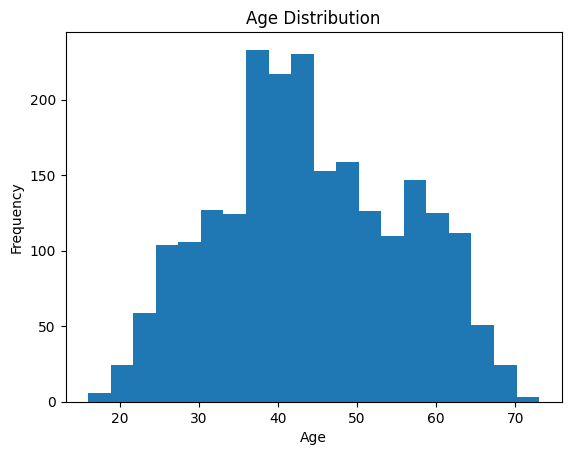

In [94]:
# Plot of the ages distribution of the customers with their ages modified to the closest quartile mean based on their income  
mdata['Age'].plot(kind='hist',bins=20)
print(mdata['Age'].describe())
print()
# Print rows with Birth Year equal to or or less than 1900
print(mdata[mdata['Year_Birth'] <= 1900])
print()
# Print the mean age of the customers whose income is in the first quartile, second quartile, third quartile and fourth quartile
print(mdata[mdata[' Income '] <= quartiles[0.25]]['Age'].mean())
print(mdata[(mdata[' Income '] > quartiles[0.25]) & (mdata[' Income '] <= quartiles[0.5])]['Age'].mean())
print(mdata[(mdata[' Income '] > quartiles[0.5]) & (mdata[' Income '] <= quartiles[0.75])]['Age'].mean())
print(mdata[mdata[' Income '] > quartiles[0.75]]['Age'].mean())
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

## Conclusion for dealing with the 'AGE' outliers

### As we can see, all foms for dealing with the outliers has very little impact on the age distribution of the dataset
### The mean remains approximately 44.13 for all methods.
### This means that because the distributions of age are very similar among any of the choices for dealing with the age outliers, our conclusions for any age related questions should be statisttically close enough to where we can be confident that if we choose any of the methods to deal with the outliers, we won't be introducing any skweness or falsity in our conclusion
### In order to keep as much of the data to answer questions that involve age and implications on income and shopping behavior, we will assign mean ages based on income quartile for the outliers, as this keeps the data context-sensitive and minimizes potential skewness or bias. 


# Missing Income Imputations


In [95]:
# imputate the missing values by looking at education and marital status and assume that the customers with similar education and marital status make the same yearly income, on average.
# Group by Education and Marital Status and calculate the mean income for each group
grouped_income_by_education_and_marital_status = mdata.groupby(['Education','Marital_Status'])[' Income '].mean()

# Iterate over the missing income rows and assign the mean income of the group to which the customer belongs
for index, row in missing_income_rows.iterrows():
    education = row['Education']
    marital_status = row['Marital_Status']
    mean_income = grouped_income_by_education_and_marital_status[education][marital_status]
    mdata.at[index, ' Income '] = mean_income

# Check if there are still missing values
print(mdata.isnull().sum())


print(mdata.loc[missing_income_rows.index])


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Age                    0
dtype: int64
         ID  Year_Birth   Education Marital_Status       Income   Kidhome  \
134    8996        1957         PhD        Married  57532.427083        2   
262    1994        1983  Graduation        Married  50330.972286        1   
394    3769        1972        

# We will now look at other outliers that could affect our conclusions or answers to our project questions, namely:
- income outliers
- total purchases outliers
- outliers for purchases on web
- outliers for purchases through catalog
- outliers for purchases at store
- US based purchases outliers
- Recency outliers
- Product specific outliers (wines,fruits,meats,fish,sweets, and gold )
- Complaint frequency outliers

## Income outliers


count      2240.000000
mean      52235.887961
std       25040.043654
min        1730.000000
25%       35538.750000
50%       51301.000000
75%       68289.750000
max      666666.000000
Name:  Income , dtype: float64


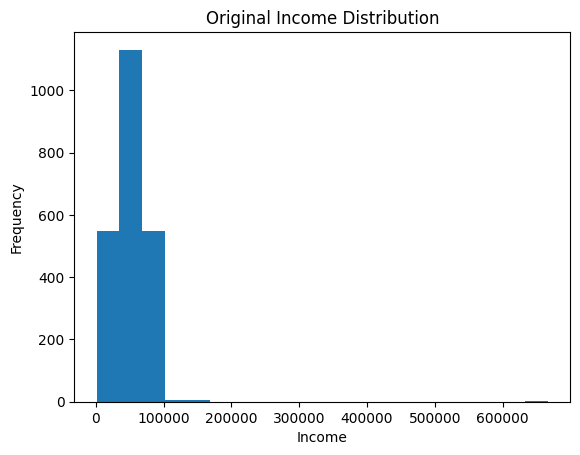

In [96]:
# distribution of income vs frequency   
mdata[' Income '].plot(kind='hist',bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Original Income Distribution')

print(mdata[' Income '].describe())

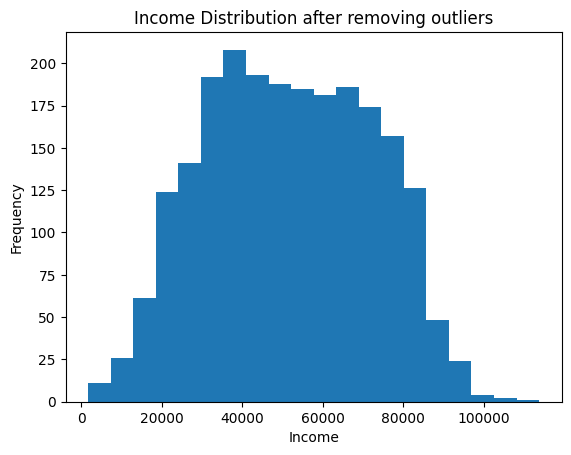

count      2232.000000
mean      51628.832004
std       20604.164172
min        1730.000000
25%       35434.750000
50%       51171.500000
75%       68118.000000
max      113734.000000
Name:  Income , dtype: float64

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age'],
      dtype='object')


In [97]:
# We will now remove income outliers using the z-score method
z_scores = (mdata[' Income '] - mdata[' Income '].mean()) / mdata[' Income '].std()
mdata_no_income_outliers = mdata.copy()
mdata_no_income_outliers = mdata_no_income_outliers[(z_scores >= -3) & (z_scores <= 3)]
#plot the income distribution after removing outliers
mdata_no_income_outliers[' Income '].plot(kind='hist',bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution after removing outliers')
plt.show()
print(mdata_no_income_outliers[' Income '].describe())
print()
print(mdata_no_income_outliers.columns)

In [99]:
# we will now calculate if there is any statistical significance between the dataset with income outliers and the dataset without income outliers
# using the derivation of the p-value from the t-statistic. A p-value less than 0.05 indicates that there is a significant difference between the two datasets, otherwise there is no significant difference and the two datasets can be considered to be practically the same.
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(mdata[' Income '], mdata_no_income_outliers[' Income '])
print(f'The t-statistic is {t_stat} and the p-value is {p_value}')
print()




The t-statistic is 0.8850690827341898 and the p-value is 0.3761669792300474



## Now, even though we don't see any statistical significance differences between the original dataset and the dataset without income outliers, we'll do a quick analysis to see how the income outliers are affecting total purchases and other variable before deciding whether to drop them or keep them

count    2240.000000
mean        9.071875
std         5.344473
min         0.000000
25%         4.000000
50%         9.000000
75%        13.000000
max        43.000000
Name: Total_Spending, dtype: float64



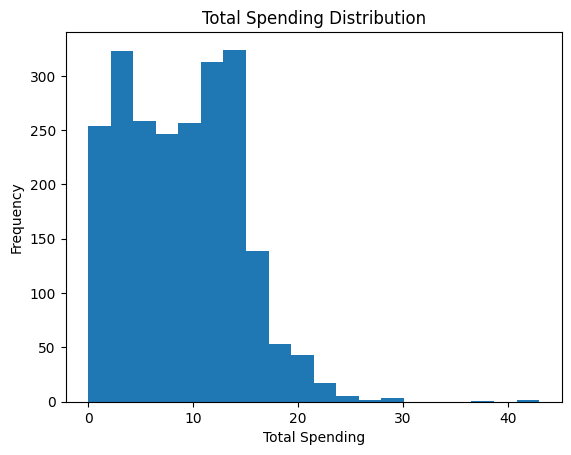

The correlation between the total number of purchases and income is 0.4892972301648041



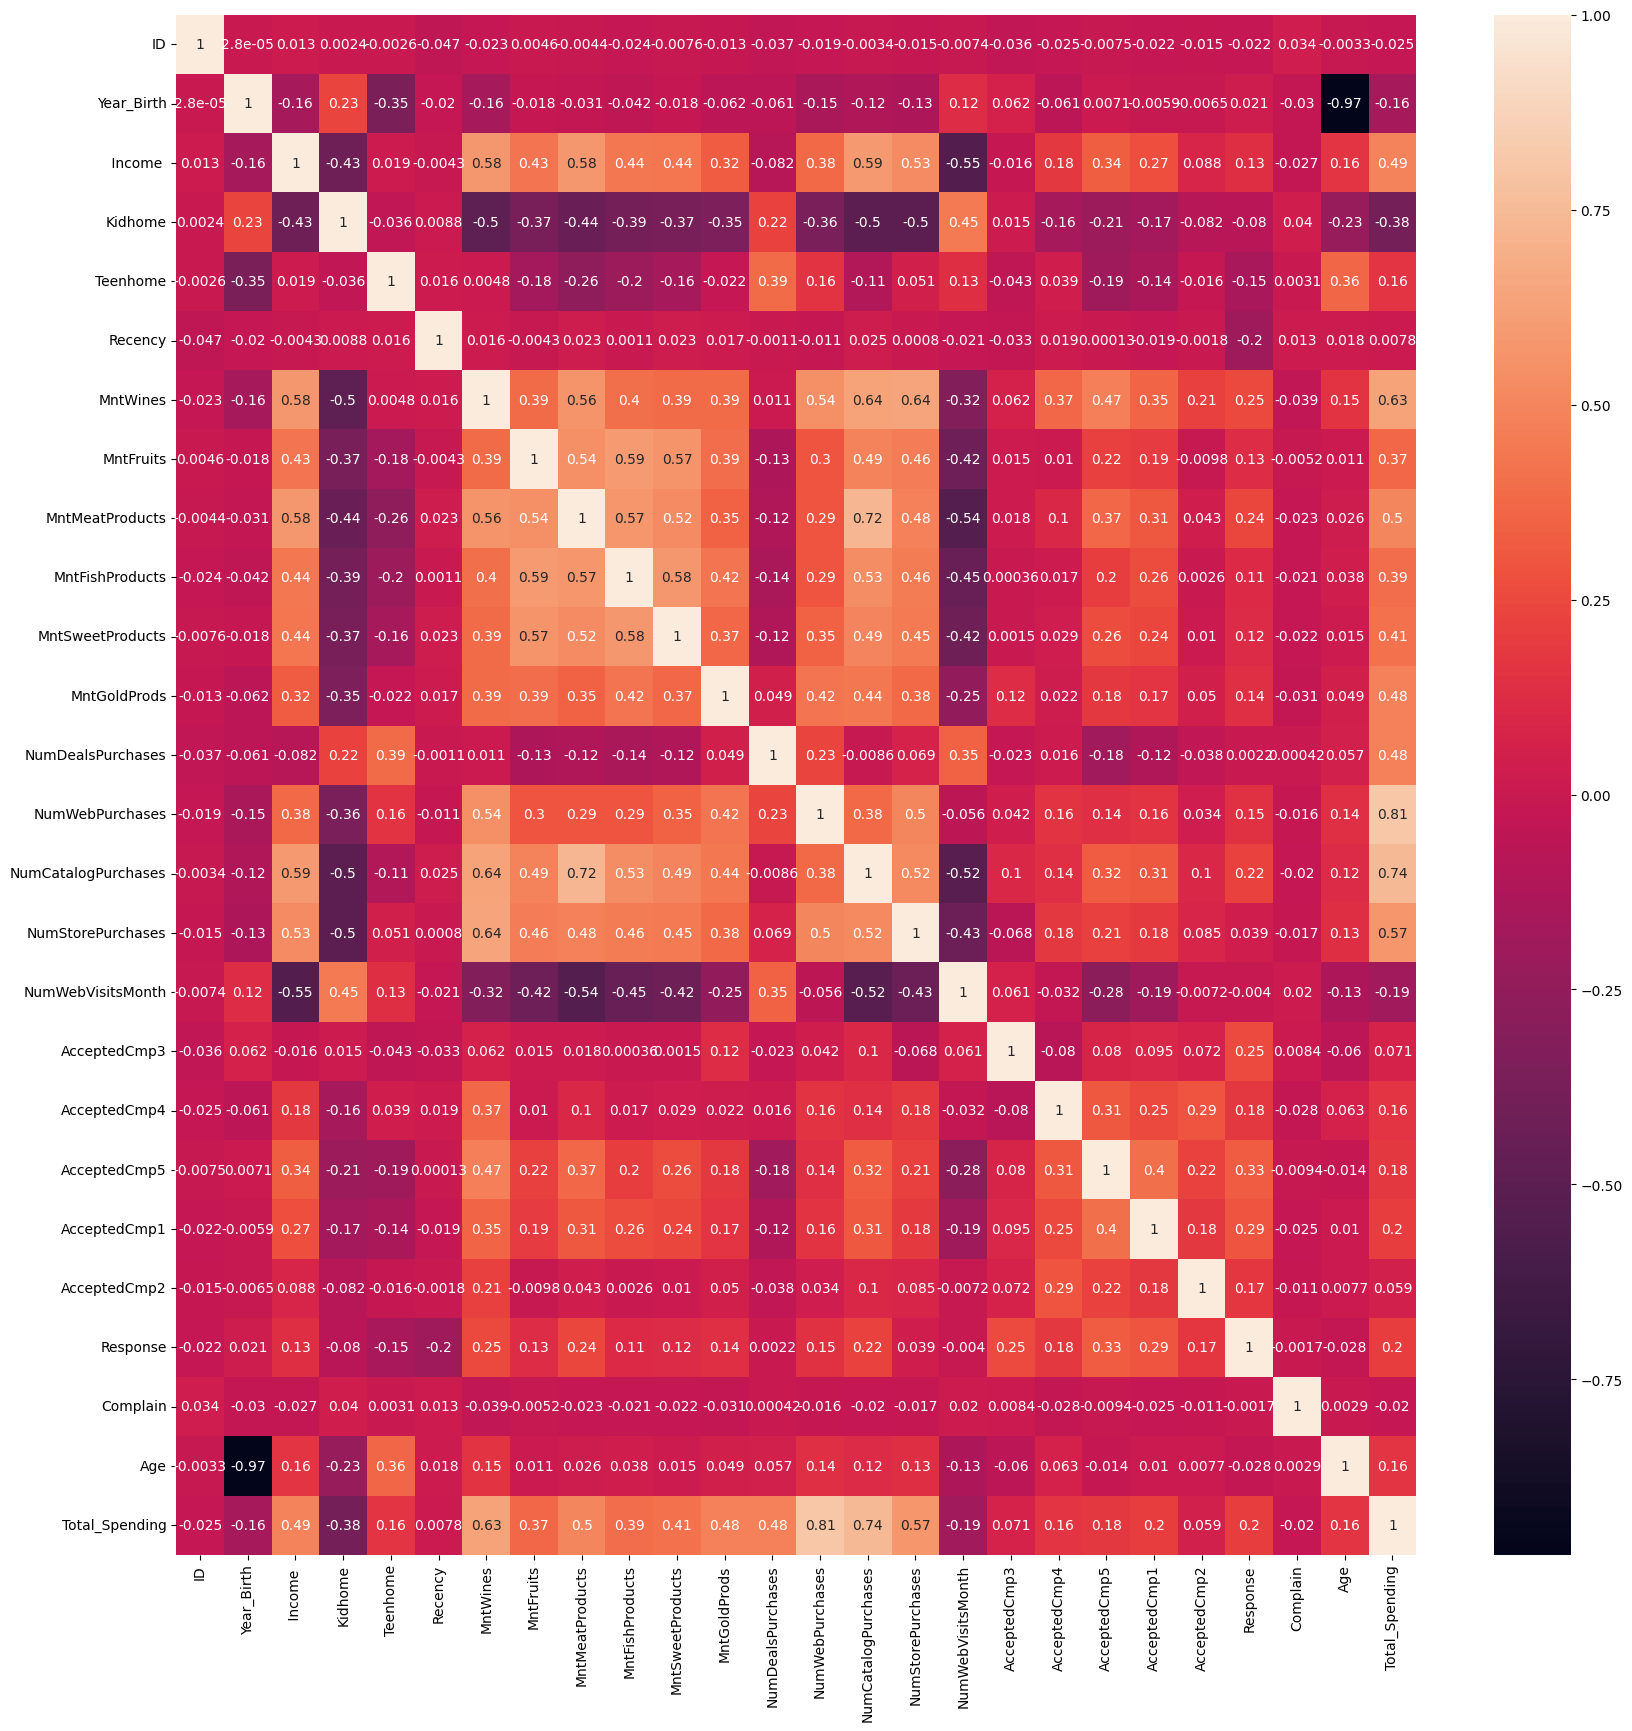

In [100]:
# We will compute total number of purchases made by each customer by summing the number of purchases made using the three different channels
mdata['Total_Spending'] = mdata['NumDealsPurchases'] + mdata['NumWebPurchases'] + mdata['NumCatalogPurchases']
print(mdata['Total_Spending'].describe())
print()
plot = mdata['Total_Spending'].plot(kind='hist',bins=20)
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.title('Total Spending Distribution')
plt.show()
# We will not see if there is any correlation between the total number of purchases made by each customer and their income
correlation = mdata['Total_Spending'].corr(mdata[' Income '])
print(f'The correlation between the total number of purchases and income is {correlation}')
print()
# Heatmap of the correlation between the numerical columns
#figure size
plt.figure(figsize=(20,20))
#select numerical columns
numerical_data=mdata.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()




Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age'],
      dtype='object')

count    2232.000000
mean        9.051971
std         5.243936
min         0.000000
25%         4.000000
50%         9.000000
75%        13.000000
max        43.000000
Name: Total_Spending, dtype: float64



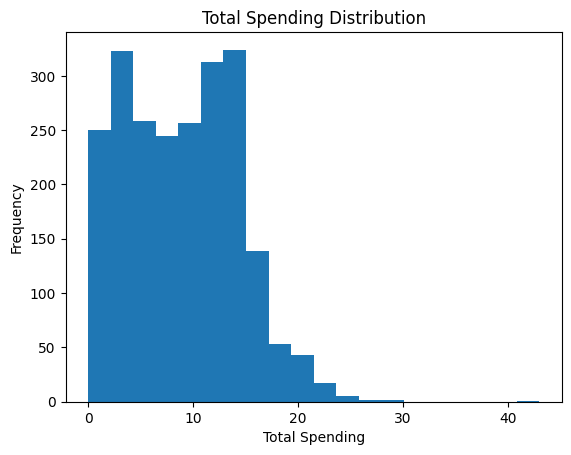

The correlation between the total number of purchases or total spending and income is 0.5905927677220907



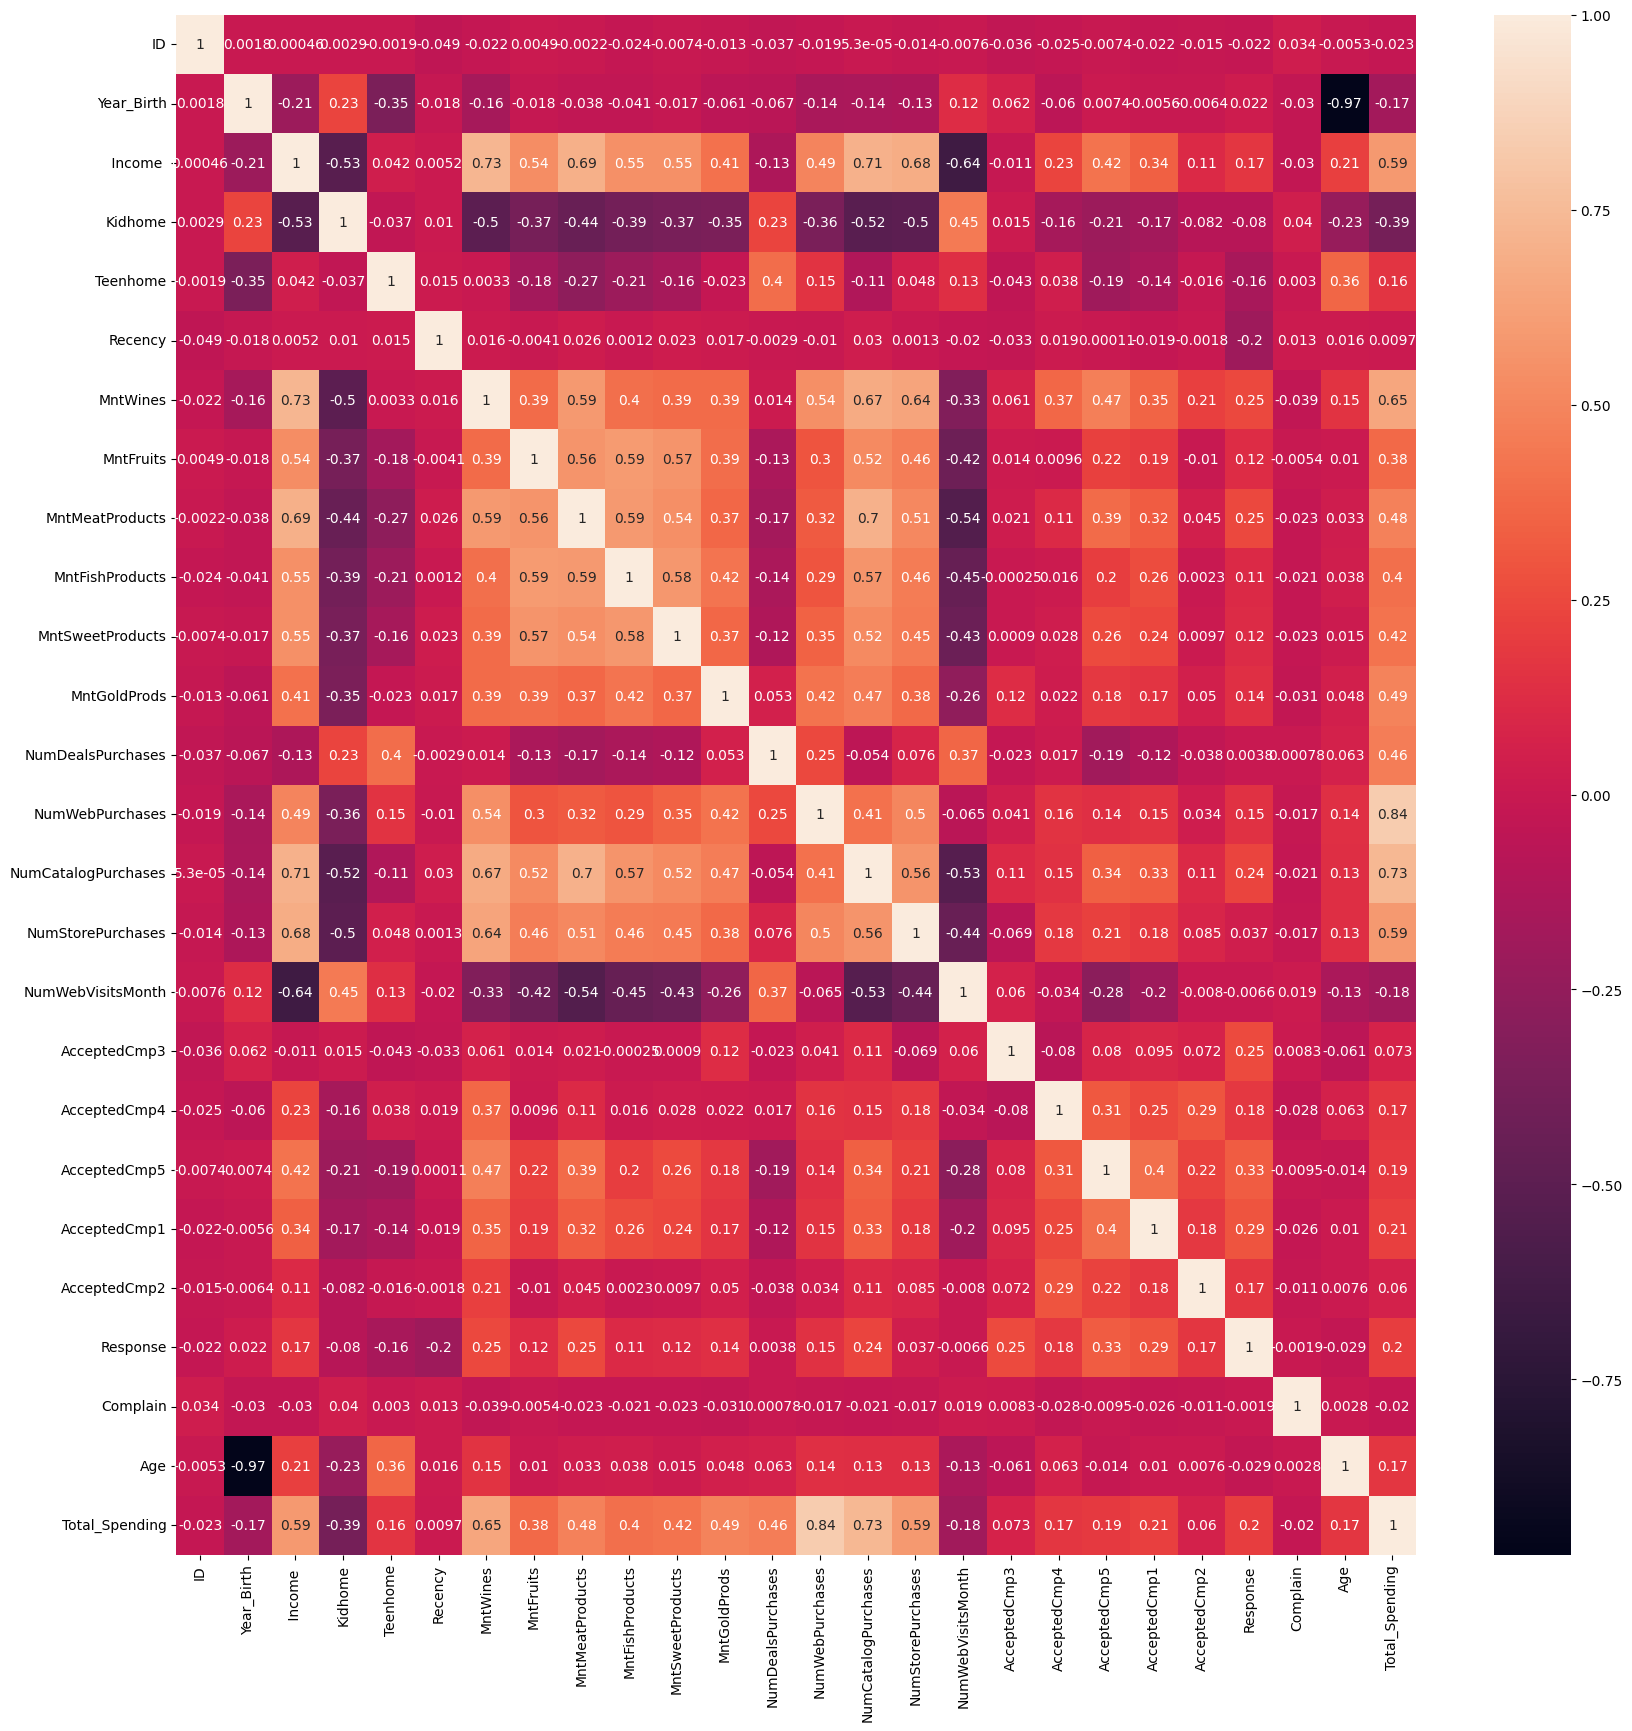

In [102]:
print(mdata_no_income_outliers.columns)
print()


# We will compute total number of purchases made by each customer by summing the number of purchases made using the three different channels using the dataset without income outliers
mdata_no_income_outliers['Total_Spending'] = mdata_no_income_outliers['NumDealsPurchases'] + mdata_no_income_outliers['NumWebPurchases'] + mdata_no_income_outliers['NumCatalogPurchases']
print(mdata_no_income_outliers['Total_Spending'].describe())
print()
plot = mdata_no_income_outliers['Total_Spending'].plot(kind='hist',bins=20)
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.title('Total Spending Distribution')
plt.show()
# We will not see if there is any correlation between the total number of purchases made by each customer and their income
correlation = mdata_no_income_outliers['Total_Spending'].corr(mdata_no_income_outliers[' Income '])
print(f'The correlation between the total number of purchases or total spending and income is {correlation}')
print()
# Heatmap of the correlation between the numerical columns
#figure size
plt.figure(figsize=(20,20))
#select numerical columns
numerical_data=mdata_no_income_outliers.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


## We see from the heat maps above, that the correlation between income and total spending gets stronger when we use the dataset without income outliers
## This suggests that the income outliers is introducing some noise into the relationship between income and total spending.
## Moreover, removing income outliers strengthens the observed correlation between income and total spending while leaving the correlations with other variables largely unaffected.
## From this we can conclude that making the decision to use the dataset without income outliers will be beneficial for our purposes by giving us a clearer picture of the true relationship between total spending and income and can lead to more accurate insights and predictions

# We now will move to the Total_Spending outliers. We will try to determine how the Total_Spending outliers affect other correlations by dropping outliers outside the 99th percentile and checking correlations once again

count    2232.000000
mean        9.051971
std         5.243936
min         0.000000
25%         4.000000
50%         9.000000
75%        13.000000
max        43.000000
Name: Total_Spending, dtype: float64

9.0


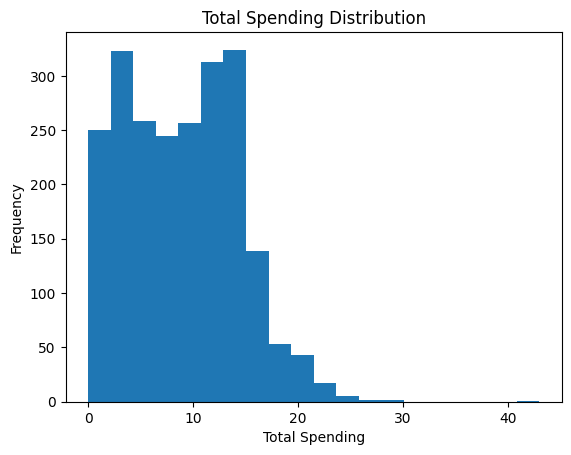

The correlation between the total number of purchases and income is 0.5905927677220907



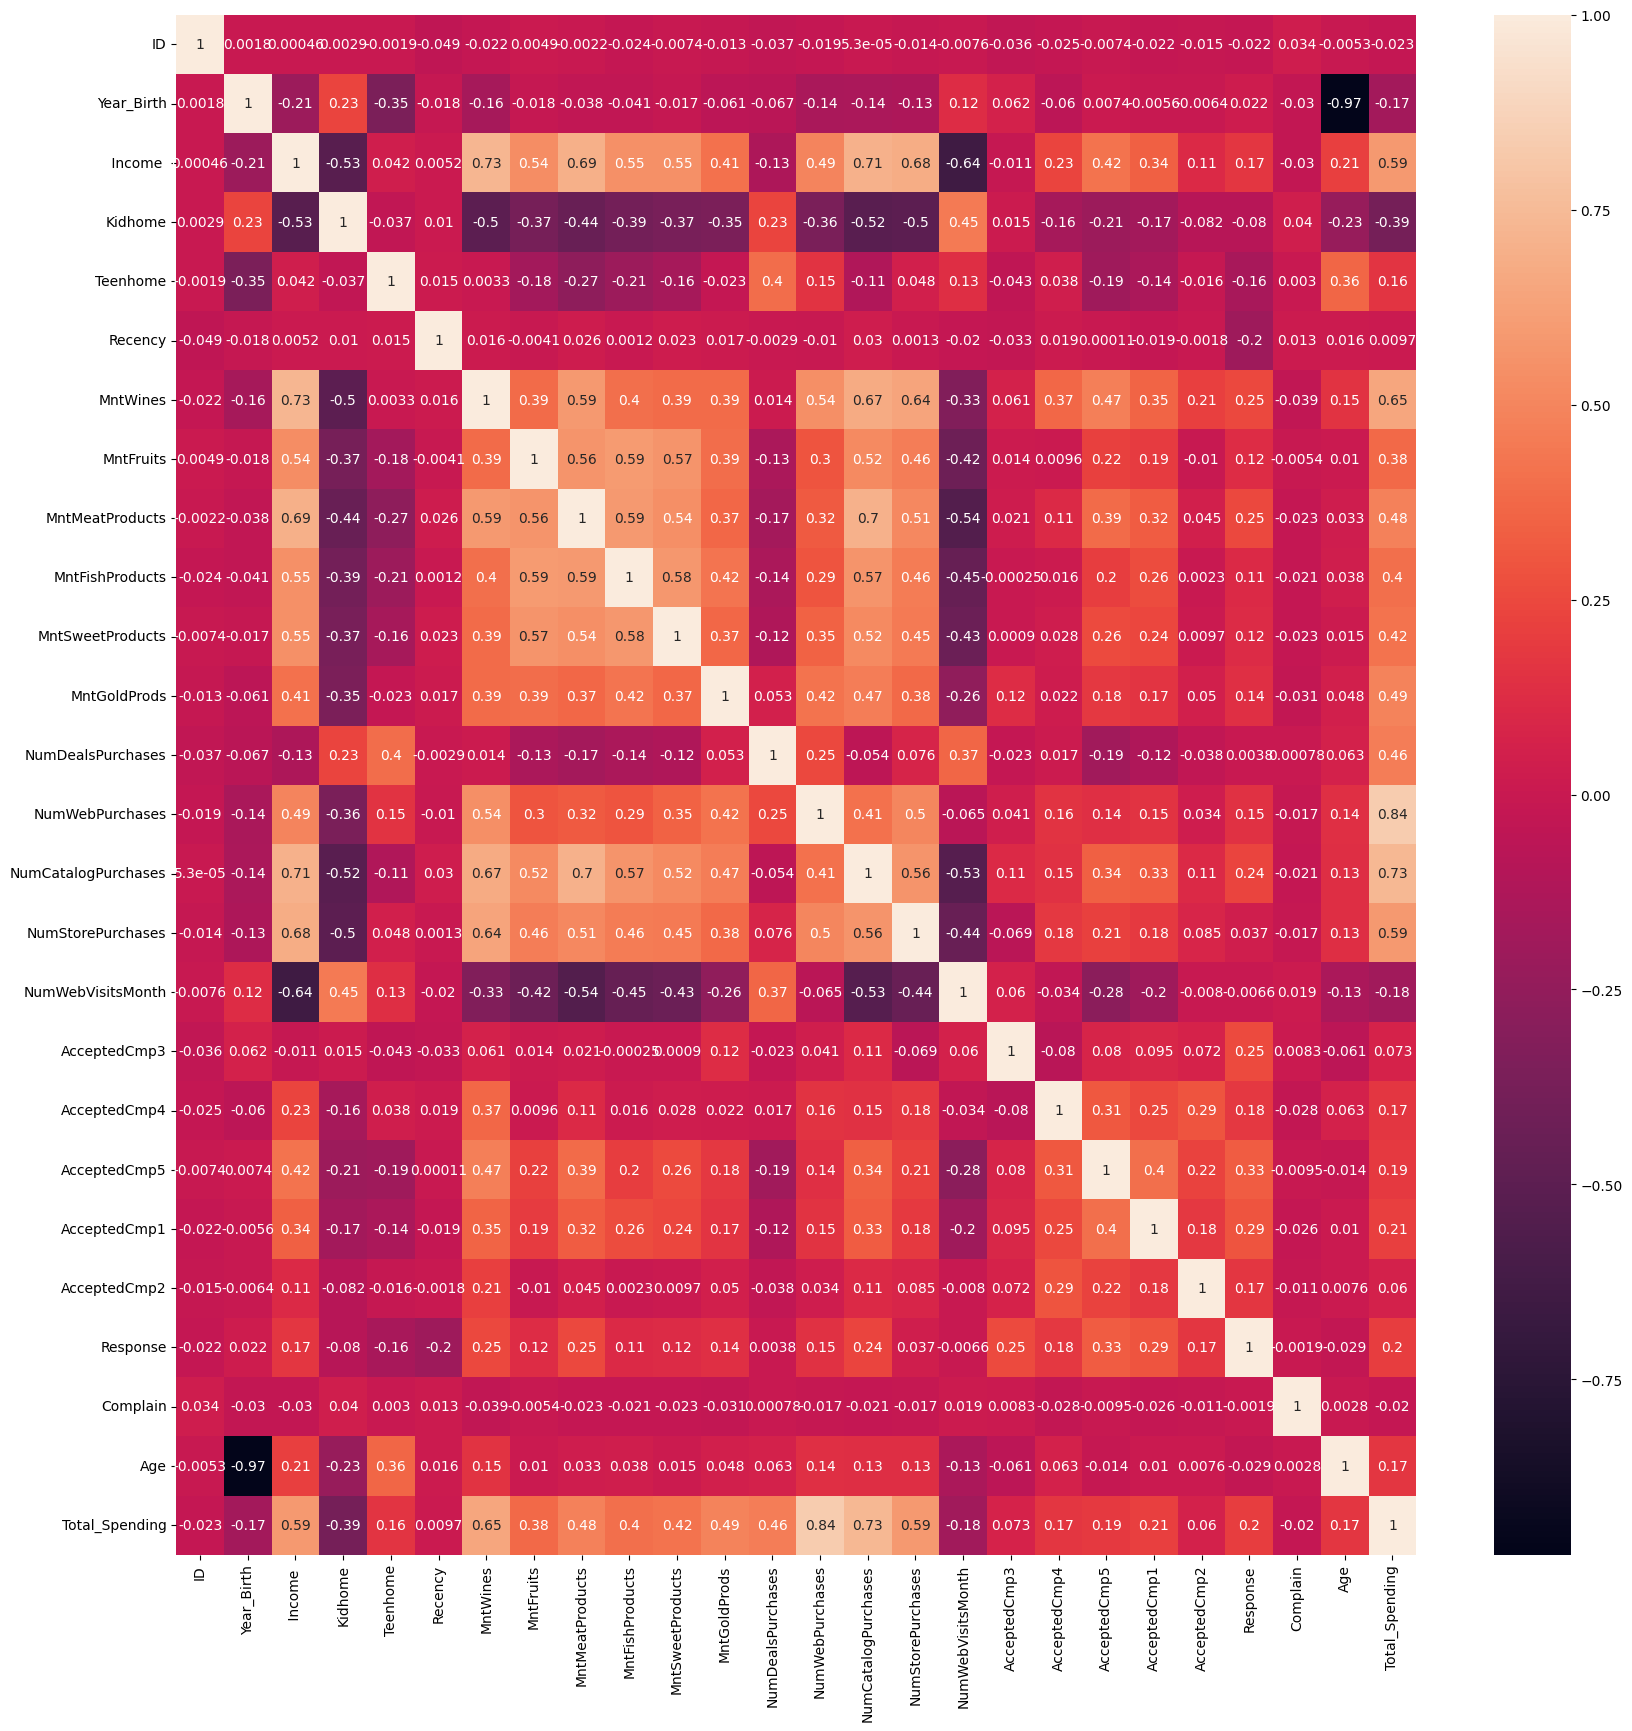

skewness of total_spending:  0.5388356830972644


In [103]:
# We will now drop Total_Purchase outliers by capping the values at the 99th percentile using the dataset without income outliers
mdata_no_income_outliers_no_purchase_outliers = mdata_no_income_outliers.copy()
##########    mdata_no_income_outliers_no_purchase_outliers['Total_Spending'] = mdata_no_income_outliers_no_purchase_outliers['Total_Spending'].clip(upper=mdata_no_income_outliers_no_purchase_outliers['Total_Spending'].quantile(0.99))
print(mdata_no_income_outliers_no_purchase_outliers['Total_Spending'].describe())
print()
# print median of the total purchases
print(mdata_no_income_outliers_no_purchase_outliers['Total_Spending'].median())
plot = mdata_no_income_outliers_no_purchase_outliers['Total_Spending'].plot(kind='hist',bins=20)
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.title('Total Spending Distribution')
plt.show()
# We will not see if there is any correlation between the total number of purchases made by each customer and their income
correlation = mdata_no_income_outliers_no_purchase_outliers['Total_Spending'].corr(mdata_no_income_outliers_no_purchase_outliers[' Income '])
print(f'The correlation between the total number of purchases and income is {correlation}')
print()
# Heatmap of the correlation between the numerical columns
#figure size
plt.figure(figsize=(20,20))
#select numerical columns
numerical_data=mdata_no_income_outliers_no_purchase_outliers.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
# skeweness of the total purchases
print('skewness of total_spending: ',mdata_no_income_outliers_no_purchase_outliers['Total_Spending'].skew())



## We can see from the total_spending distribution and column description that the mean remained relateively the same at 9.0
## Moreover, the heat map with the total_spending capped at the 99th percentile for the data set without income outliers shows the following:
- Income Correlation: The correlation between income and total spending increased slightly from 0.59 to 0.60, indicating a marginally stronger relationship when extreme values are capped.
- Product Performance: The correlations between total purchases and various product categories (e.g., MntWines, MntFruits, etc.) show slight increases, suggesting a more robust relationship after capping outliers.
- Distribution Channels: The correlation between total spending and store purchases increased from 0.59 to 0.61, indicating a slightly stronger relationship when outliers are capped.

## Conclusion:
### Enhancement: Capping total spending at the 99th percentile seems to enhance the analysis slightly. The correlations become marginally stronger, suggesting that extreme values might have been adding noise to the data, masking some of the true relationships.
### Consistency: The overall structure of the correlation matrix remains consistent, indicating that the relationships between variables are robust even when outliers are capped.

## Thus we will take the following steps:
1. We will drop income outliers and only include rows with a z-score betweeen -3 and 3
2. We will drop total_purchase outliers that lie outside the 99th percentile


## We will now create a column for total number of children by adding the Kidhome and Teenhome columns



count    2232.000000
mean        0.951613
std         0.751742
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Total_Number_of_Children, dtype: float64



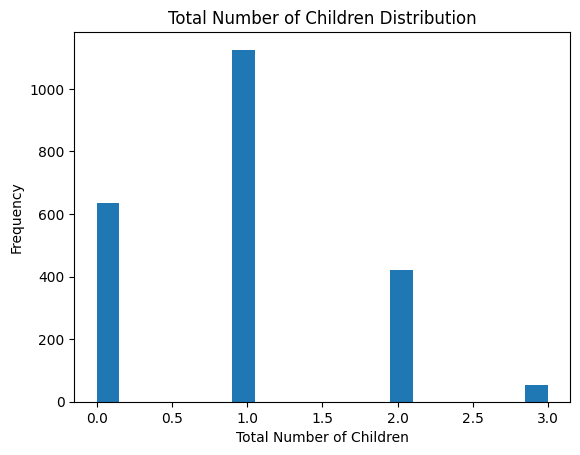


The correlation between the total number of children and income is -0.34724067752942883



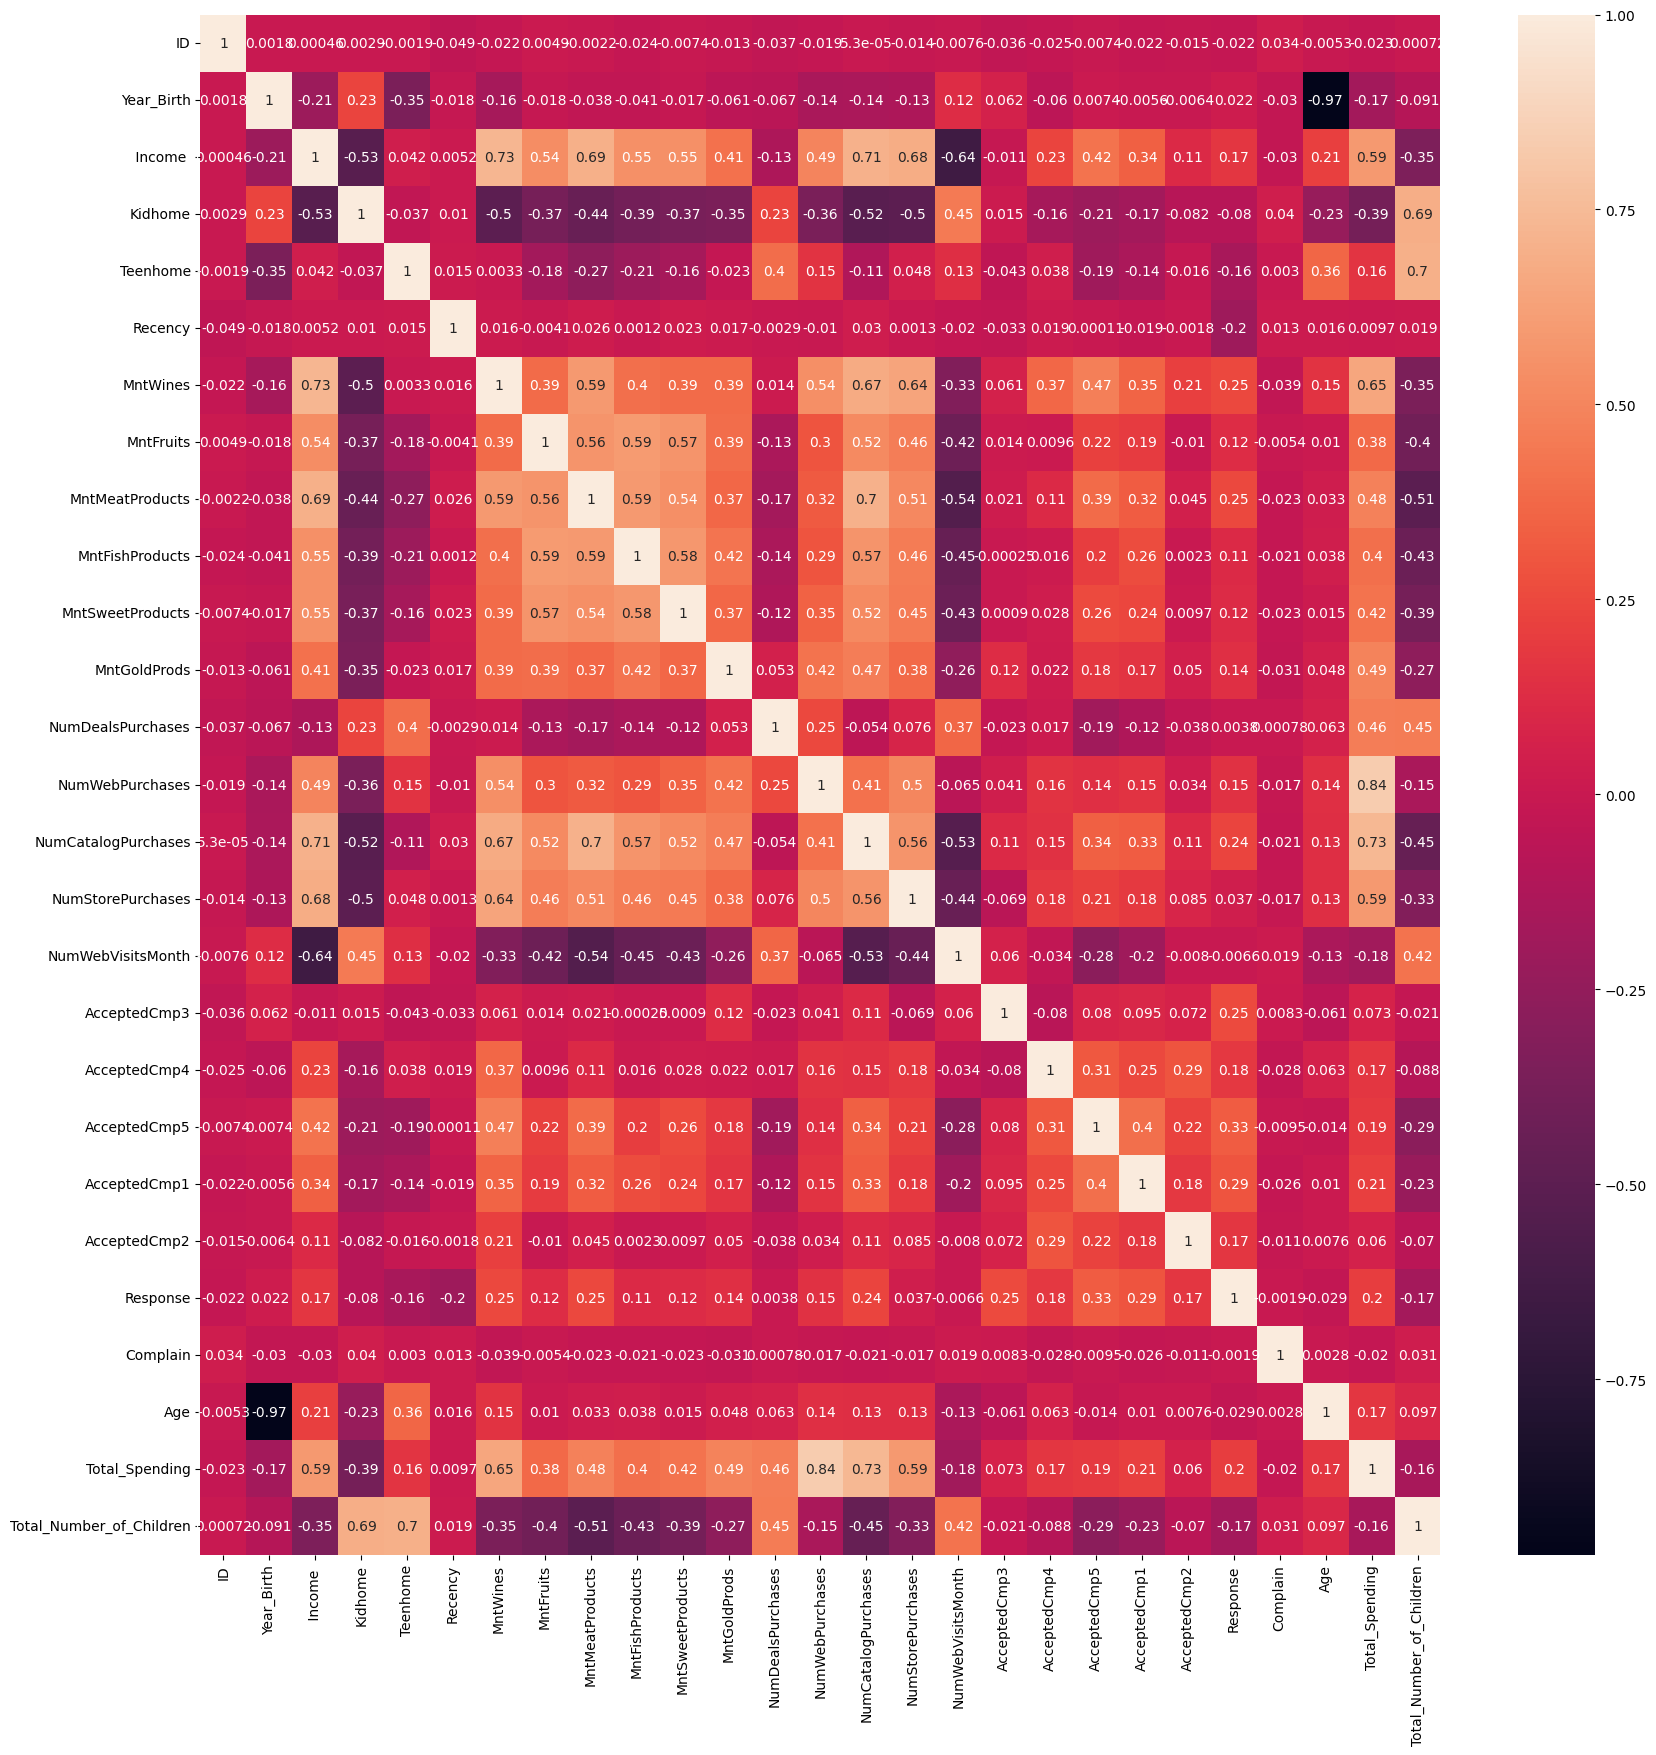

In [104]:
# We will add a total_number_of_children column to the dataset by summing the number of children and teenagers
mdata_no_income_outliers_no_purchase_outliers['Total_Number_of_Children'] = mdata_no_income_outliers_no_purchase_outliers['Kidhome'] + mdata_no_income_outliers_no_purchase_outliers['Teenhome']
print(mdata_no_income_outliers_no_purchase_outliers['Total_Number_of_Children'].describe())
print()
plot = mdata_no_income_outliers_no_purchase_outliers['Total_Number_of_Children'].plot(kind='hist',bins=20)
plt.xlabel('Total Number of Children')
plt.ylabel('Frequency')
plt.title('Total Number of Children Distribution')
plt.show()
# We will now see if there is any correlation between the total number of children and income
correlation = mdata_no_income_outliers_no_purchase_outliers['Total_Number_of_Children'].corr(mdata_no_income_outliers_no_purchase_outliers[' Income '])
print()
print(f'The correlation between the total number of children and income is {correlation}')
print()
# Heatmap of the correlation between the numerical columns
#figure size
plt.figure(figsize=(20,20))
#select numerical columns
numerical_data=mdata_no_income_outliers_no_purchase_outliers.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()



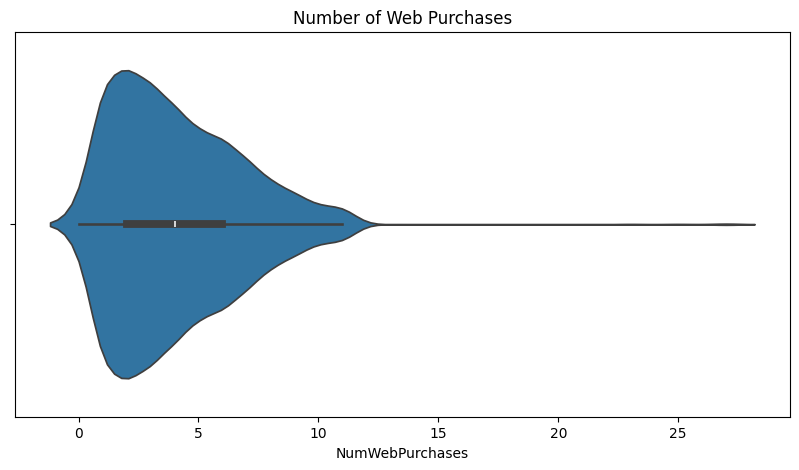

count    2232.000000
mean        4.097670
std         2.774726
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

Median:  4.0



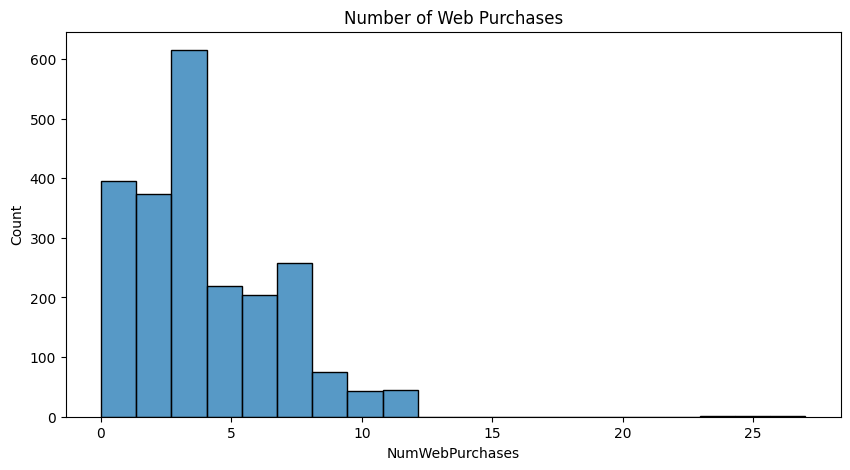

count    2232.000000
mean        4.097670
std         2.774726
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64


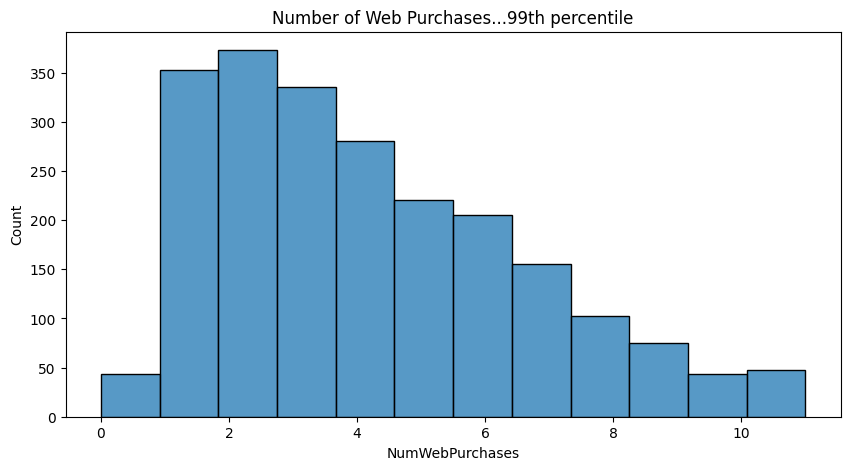

count    2232.000000
mean        4.071685
std         2.637737
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        11.000000
Name: NumWebPurchases, dtype: float64


In [105]:
## We will now check the outliers for the following:


# create a plot to see outliers for purchases on the web
plt.figure(figsize=(10,5))
sns.violinplot(x=mdata_no_income_outliers_no_purchase_outliers['NumWebPurchases'])
plt.title('Number of Web Purchases')
plt.show()
print(mdata_no_income_outliers_no_purchase_outliers['NumWebPurchases'].describe())
print()
print('Median: ',mdata_no_income_outliers_no_purchase_outliers['NumWebPurchases'].median())
print()
# create a plot to see the distriution of the number of web purchases without removing web purchase outliers
plt.figure(figsize=(10,5))
sns.histplot(mdata_no_income_outliers_no_purchase_outliers['NumWebPurchases'],bins=20)
plt.title('Number of Web Purchases')
plt.show()
print(mdata_no_income_outliers_no_purchase_outliers['NumWebPurchases'].describe())
# remove outliers for number of web purchases
mdata_no_income_outliers_no_purchase_or_web_outliers = mdata_no_income_outliers_no_purchase_outliers.copy()
mdata_no_income_outliers_no_purchase_or_web_outliers['NumWebPurchases'] = mdata_no_income_outliers_no_purchase_or_web_outliers['NumWebPurchases'].clip(upper=mdata_no_income_outliers_no_purchase_or_web_outliers['NumWebPurchases'].quantile(0.99))
# create a plot to see the distriution of the number of web purchases without removing web purchase outliers
plt.figure(figsize=(10,5))
sns.histplot(mdata_no_income_outliers_no_purchase_or_web_outliers['NumWebPurchases'],bins=12)
plt.title('Number of Web Purchases...99th percentile')
plt.show()
print(mdata_no_income_outliers_no_purchase_or_web_outliers['NumWebPurchases'].describe())
# mdata_no_income_outliers_no_purchase_outliers['NumWebPurchases'] = mdata_no_income_outliers_no_purchase_outliers['NumWebPurchases'].clip(upper=mdata_no_income_outliers_no_purchase_outliers['NumWebPurchases'].quantile(0.99))
# sns.violinplot(x=mdata_no_income_outliers_no_purchase_outliers['NumWebPurchases'])
# plt.title('Number of Web Purchases...99th percentile')
# plt.show()
# print(mdata_no_income_outliers_no_purchase_outliers['NumWebPurchases'].describe())
# print()


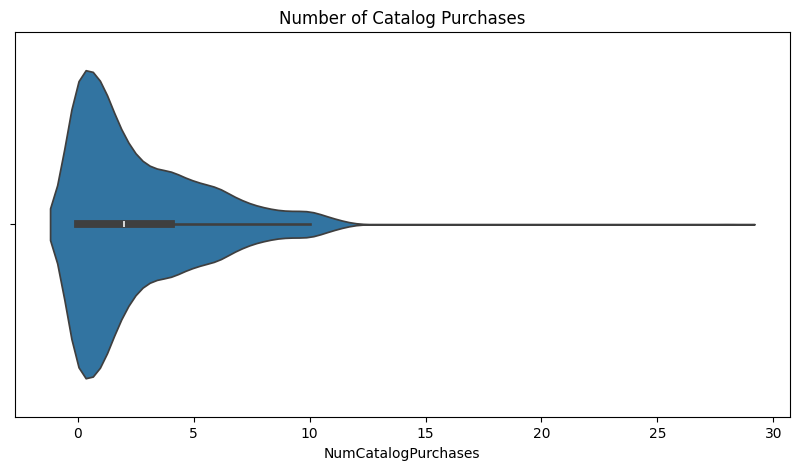

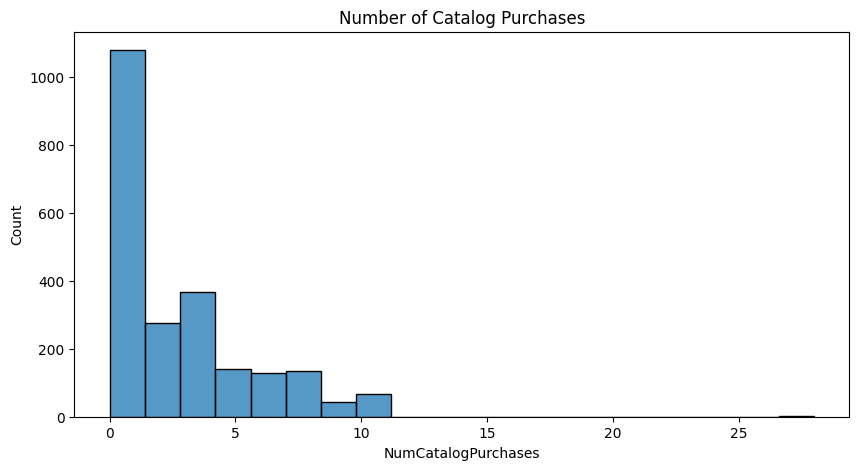


Catalog Purhases including outliers
count    2232.000000
mean        2.636201
std         2.795959
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64



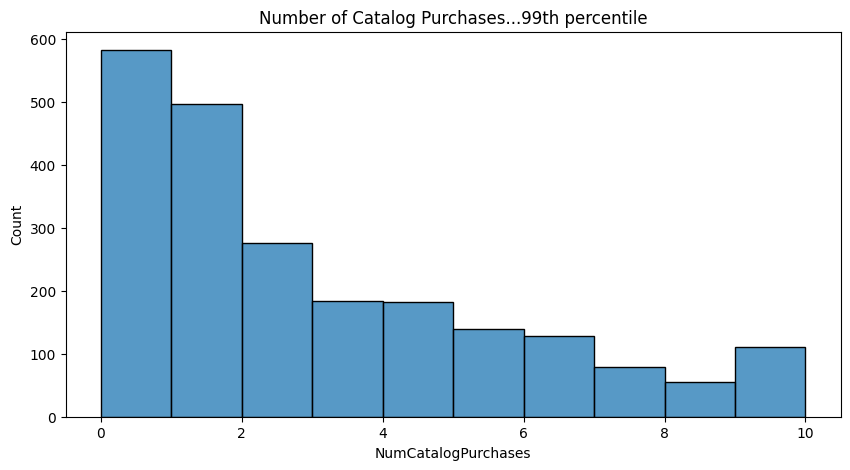

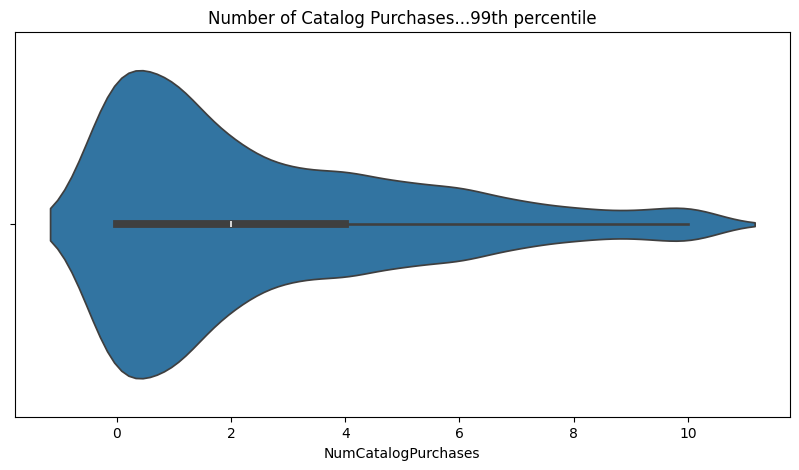

count    2232.000000
mean        2.619624
std         2.723806
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        10.000000
Name: NumCatalogPurchases, dtype: float64


In [106]:
# Total Purchases through catalog outliers
plt.figure(figsize=(10,5))
sns.violinplot(x=mdata_no_income_outliers_no_purchase_or_web_outliers['NumCatalogPurchases'])
plt.title('Number of Catalog Purchases')
plt.show()
# Total Purchases through catalog outliers histogram
plt.figure(figsize=(10,5))
sns.histplot(mdata_no_income_outliers_no_purchase_or_web_outliers['NumCatalogPurchases'],bins=20)
plt.title('Number of Catalog Purchases')
plt.show()
print()
print('Catalog Purhases including outliers')
print(mdata_no_income_outliers_no_purchase_or_web_outliers['NumCatalogPurchases'].describe())
print()
# Total Purchases through catalog 99th percentile
# remove outliers for number of catalog purchases
mdata_no_income_outliers_no_purchase_or_web_cat_outliers = mdata_no_income_outliers_no_purchase_or_web_outliers.copy()
mdata_no_income_outliers_no_purchase_or_web_cat_outliers['NumCatalogPurchases'] = mdata_no_income_outliers_no_purchase_or_web_cat_outliers['NumCatalogPurchases'].clip(upper=mdata_no_income_outliers_no_purchase_or_web_cat_outliers['NumCatalogPurchases'].quantile(0.99))
# create a plot to see the distriution of the number of catalog purchases without removing catalog purchase outliers
plt.figure(figsize=(10,5))
sns.histplot(mdata_no_income_outliers_no_purchase_or_web_cat_outliers['NumCatalogPurchases'],bins=10)
plt.title('Number of Catalog Purchases...99th percentile')
plt.show()
# violin plot for catalog purchases after removing outliers
plt.figure(figsize=(10,5))
sns.violinplot(x=mdata_no_income_outliers_no_purchase_or_web_cat_outliers['NumCatalogPurchases'])
plt.title('Number of Catalog Purchases...99th percentile')
plt.show()
print(mdata_no_income_outliers_no_purchase_or_web_cat_outliers['NumCatalogPurchases'].describe())



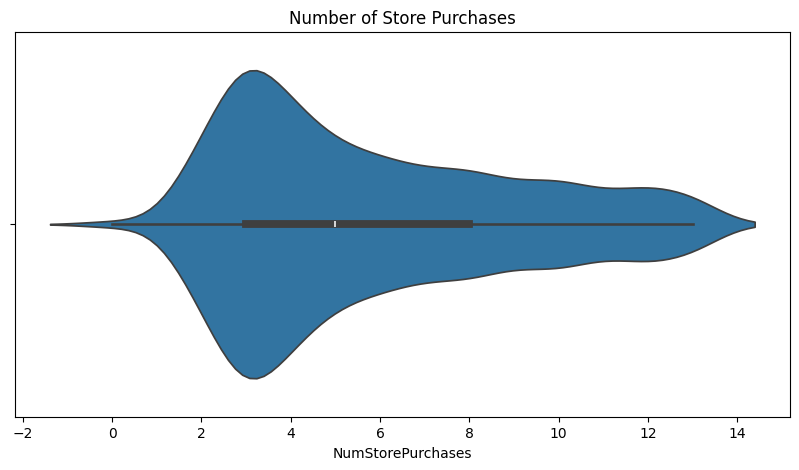

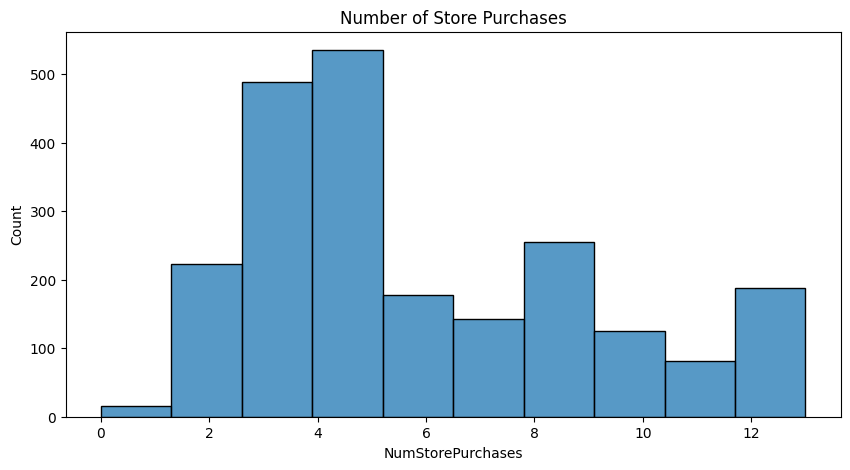


Store Purchases including outliers
count    2232.000000
mean        5.808244
std         3.242198
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64


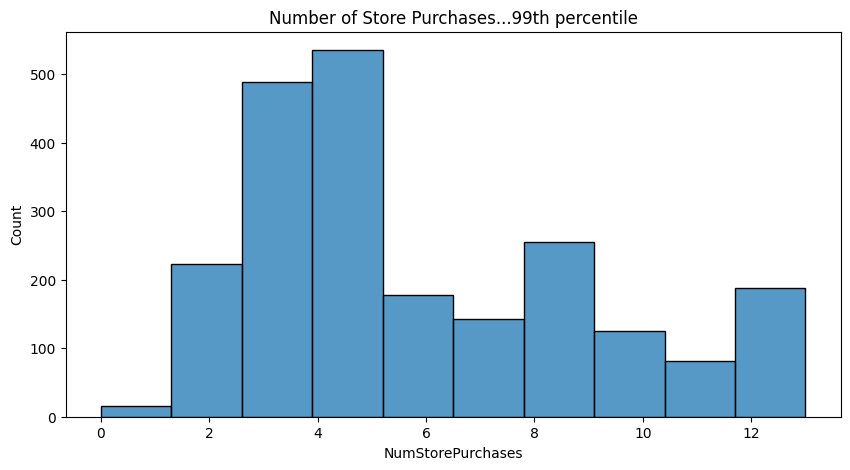

Store purchases after removing outliers
count    2232.000000
mean        5.808244
std         3.242198
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64


In [107]:
# Total Purchases at strore outliers violin plot
plt.figure(figsize=(10,5))
sns.violinplot(x=mdata_no_income_outliers_no_purchase_or_web_cat_outliers['NumStorePurchases'])
plt.title('Number of Store Purchases')
plt.show()
# Total Purchases at store outliers histogram
plt.figure(figsize=(10,5))
sns.histplot(mdata_no_income_outliers_no_purchase_or_web_cat_outliers['NumStorePurchases'],bins=10)
plt.title('Number of Store Purchases')
plt.show()
print()
#describe the number of store purchases including outliers
print('Store Purchases including outliers')
print(mdata_no_income_outliers_no_purchase_or_web_cat_outliers['NumStorePurchases'].describe())
# Total Purchases at store 99th percentile
# remove outliers for number of store purchases
mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers = mdata_no_income_outliers_no_purchase_or_web_cat_outliers.copy()
mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers['NumStorePurchases'] = mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers['NumStorePurchases'].clip(upper=mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers['NumStorePurchases'].quantile(0.99))
# create a plot to see the distriution of the number of store purchases without removing store purchase outliers
plt.figure(figsize=(10,5))
sns.histplot(mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers['NumStorePurchases'],bins=10)
plt.title('Number of Store Purchases...99th percentile')
plt.show()
# describe the number of store purchases after removing outliers
print('Store purchases after removing outliers')
print(mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers['NumStorePurchases'].describe())




In [108]:
# Head of the dataset after removing all outliers
print(mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers.head())

      ID  Year_Birth   Education Marital_Status   Income   Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced   84835.0        0         0   
1      1        1961  Graduation         Single   57091.0        0         0   
2  10476        1958  Graduation        Married   67267.0        0         1   
3   1386        1967  Graduation       Together   32474.0        1         1   
4   5371        1989  Graduation         Single   21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0     6/16/14        0       189  ...             0             0   
1     6/15/14        0       464  ...             0             0   
2     5/13/14        0       134  ...             0             0   
3     5/11/14        0        10  ...             0             0   
4      4/8/14        0         6  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Age  \
0             0             0        

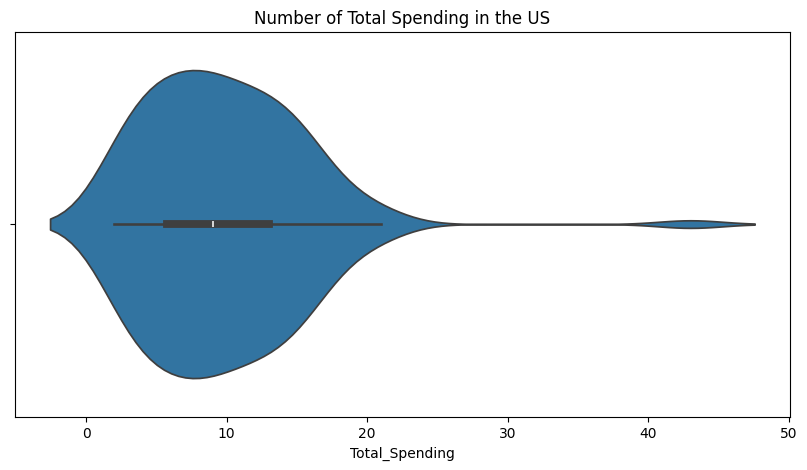

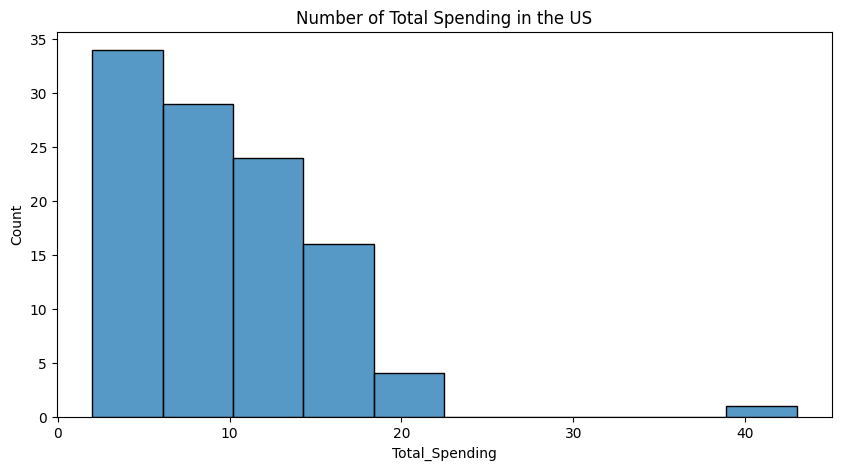


Total Spending in the US including outliers
count    108.000000
mean       9.814815
std        5.810317
min        2.000000
25%        5.750000
50%        9.000000
75%       13.000000
max       43.000000
Name: Total_Spending, dtype: float64


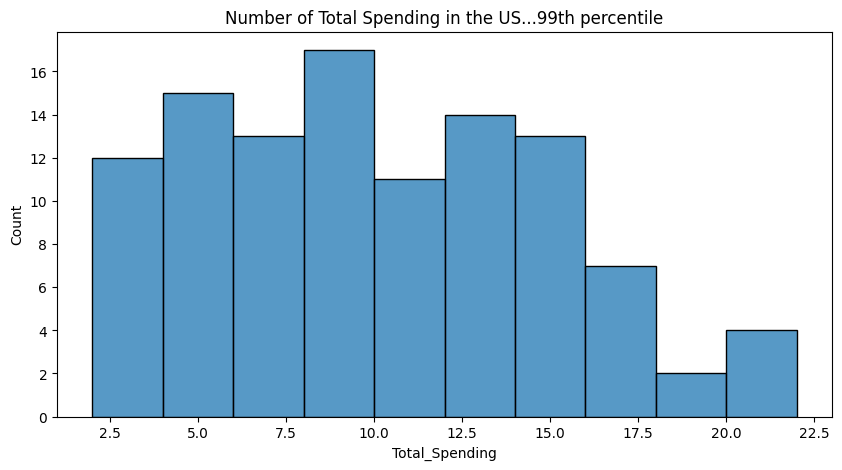

Total spending in the US after removing outliers
count    108.000000
mean       9.620370
std        4.981682
min        2.000000
25%        5.750000
50%        9.000000
75%       13.000000
max       22.000000
Name: Total_Spending, dtype: float64


In [109]:
# Outliers for Spending in the group of US violin plot
plt.figure(figsize=(10,5))
sns.violinplot(x=mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers[mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers['Country']=='US']['Total_Spending'])
plt.title('Number of Total Spending in the US')
plt.show()
# Outliers for spending in the group of US histogram
plt.figure(figsize=(10,5))
sns.histplot(mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers[mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers['Country']=='US']['Total_Spending'],bins=10)
plt.title('Number of Total Spending in the US')
plt.show()
print()
#describe the number of total spending in the US including outliers
print('Total Spending in the US including outliers')
print(mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers[mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers['Country']=='US']['Total_Spending'].describe())
# Total Spending in the US 99th percentile
# remove outliers for number of total spending in the US
mdata_no_income_outliers_no_purchase_or_web_cat_store_us_outliers = mdata_no_income_outliers_no_purchase_or_web_cat_store_outliers.copy()
mdata_no_income_outliers_no_purchase_or_web_cat_store_us_outliers['Total_Spending'] = mdata_no_income_outliers_no_purchase_or_web_cat_store_us_outliers['Total_Spending'].clip(upper=mdata_no_income_outliers_no_purchase_or_web_cat_store_us_outliers['Total_Spending'].quantile(0.99))
# create a plot to see the distribution of the number of total spending in the US without removing total purchase outliers
plt.figure(figsize=(10,5))
sns.histplot(mdata_no_income_outliers_no_purchase_or_web_cat_store_us_outliers[mdata_no_income_outliers_no_purchase_or_web_cat_store_us_outliers['Country']=='US']['Total_Spending'],bins=10)
plt.title('Number of Total Spending in the US...99th percentile')
plt.show()
# describe the number of total spending in the US after removing outliers
print('Total spending in the US after removing outliers')
print(mdata_no_income_outliers_no_purchase_or_web_cat_store_us_outliers[mdata_no_income_outliers_no_purchase_or_web_cat_store_us_outliers['Country']=='US']['Total_Spending'].describe())




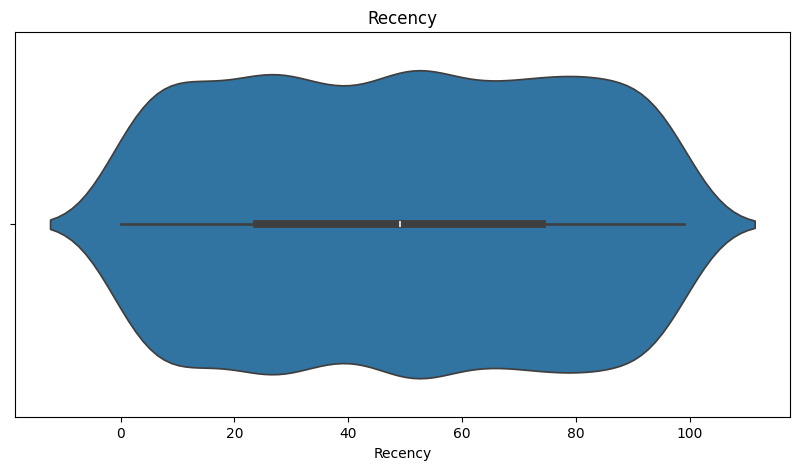

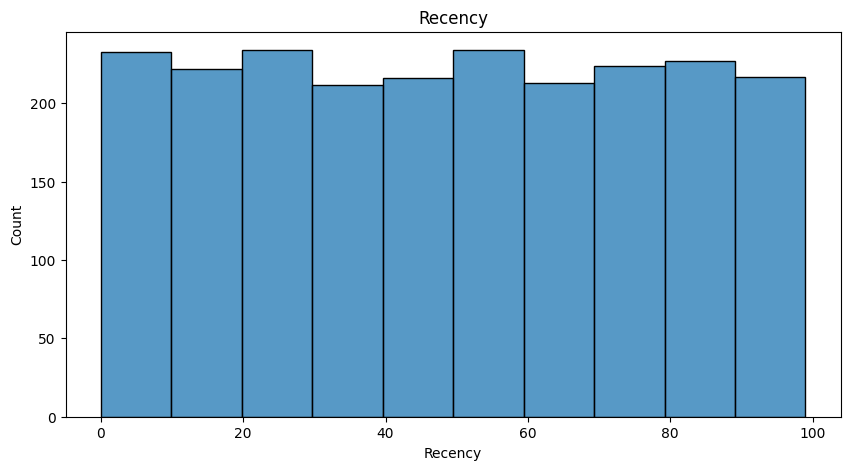


Recency including outliers
count    2232.000000
mean       49.111111
std        28.952893
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


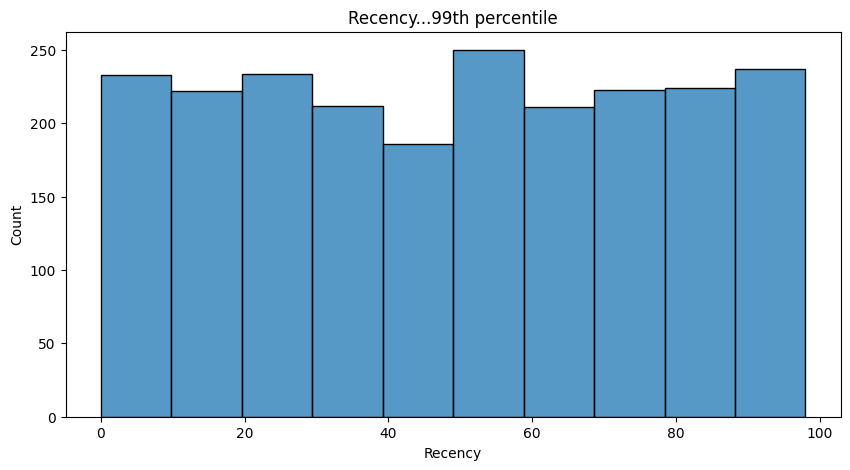

Recency after removing outliers
count    2232.000000
mean       49.103495
std        28.939891
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        98.000000
Name: Recency, dtype: float64


In [110]:
# Recency outliers violin plot
plt.figure(figsize=(10,5))
sns.violinplot(x=mdata_no_income_outliers_no_purchase_or_web_cat_store_us_outliers['Recency'])
plt.title('Recency')
plt.show()
# Recency outliers histogram
plt.figure(figsize=(10,5))
sns.histplot(mdata_no_income_outliers_no_purchase_or_web_cat_store_us_outliers['Recency'],bins=10)
plt.title('Recency')
plt.show()
print()
#describe the recency including outliers
print('Recency including outliers')
print(mdata_no_income_outliers_no_purchase_or_web_cat_store_us_outliers['Recency'].describe())
# Recency 99th percentile
# remove outliers for recency
mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_outliers = mdata_no_income_outliers_no_purchase_or_web_cat_store_us_outliers.copy()
mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_outliers['Recency'] = mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_outliers['Recency'].clip(upper=mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_outliers['Recency'].quantile(0.99))
# create a plot to see the distriution of the recency without removing recency outliers
plt.figure(figsize=(10,5))
sns.histplot(mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_outliers['Recency'],bins=10)
plt.title('Recency...99th percentile')
plt.show()
# describe the recency after removing outliers
print('Recency after removing outliers')
print(mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_outliers['Recency'].describe())


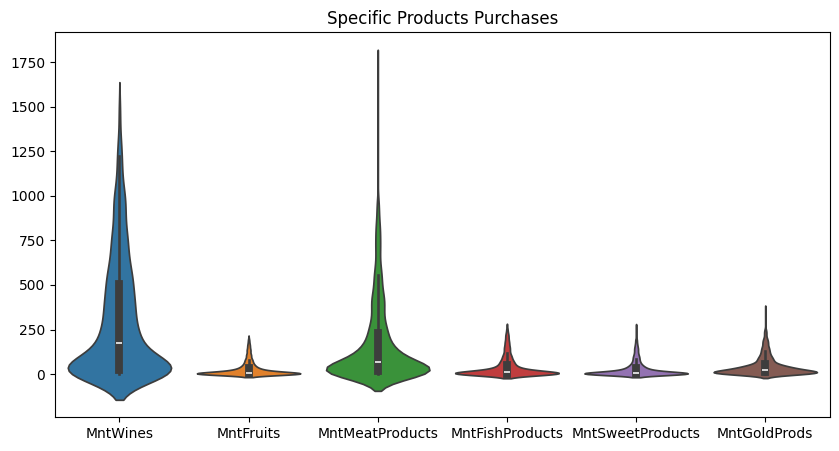

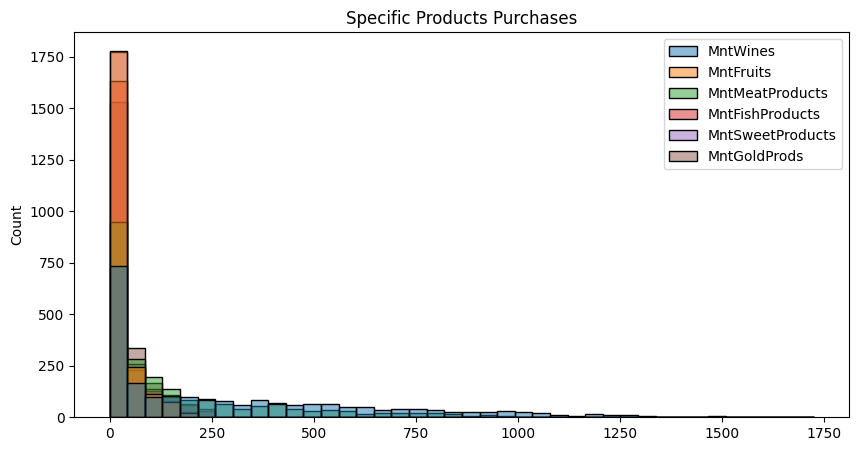


Specific Products Purchases including outliers
          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2232.000000  2232.000000      2232.000000      2232.000000   
mean    304.930108    26.380376       165.319444        37.644713   
std     336.784950    39.821532       219.401447        54.689504   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     176.000000     8.000000        67.000000        12.000000   
75%     505.000000    33.000000       231.250000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  
count       2232.000000   2232.000000  
mean          27.155466     44.166219  
std           41.325414     52.204505  
min            0.000000      0.000000  
25%            1.000000      9.000000  
50%            8.000000     24.500000  
75%           34.000000     56.250000  
max       

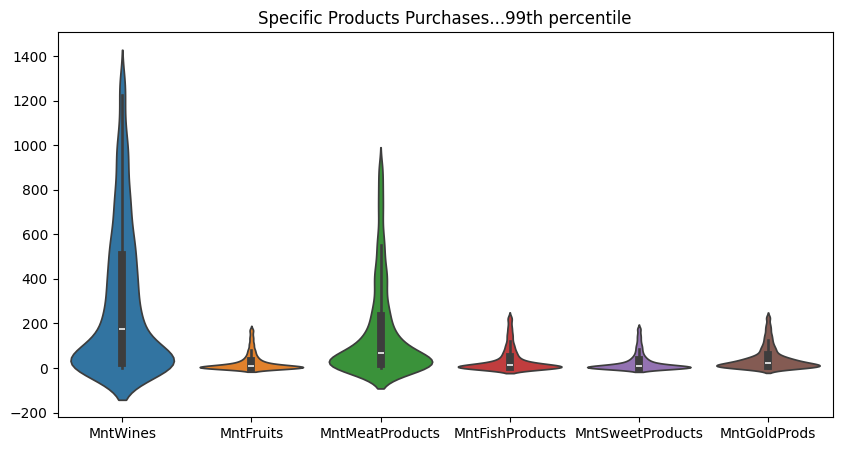

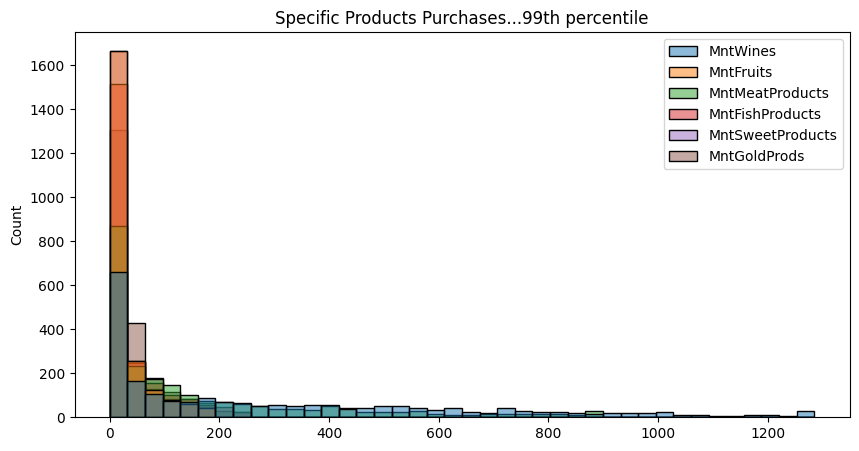

Specific Products Purchases after removing outliers
          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2232.000000  2232.000000      2232.000000      2232.000000   
mean    303.894713    26.236111       164.249494        37.471658   
std     333.502781    39.255308       214.509481        54.050985   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     176.000000     8.000000        67.000000        12.000000   
75%     505.000000    33.000000       231.250000        50.000000   
max    1285.000000   172.000000       898.690000       226.380000   

       MntSweetProducts  MntGoldProds  
count       2232.000000   2232.000000  
mean          26.967177     43.913530  
std           40.533770     51.152843  
min            0.000000      0.000000  
25%            1.000000      9.000000  
50%            8.000000     24.500000  
75%           34.000000     56.250000  
max   

In [111]:
# Specific Products Purchases ouliers
# Group purchases of specific products
specific_products = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
# violin plot for specific products purchases
plt.figure(figsize=(10,5))
sns.violinplot(data=mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_outliers[specific_products])
plt.title('Specific Products Purchases')
plt.show()
# histogram for specific products purchases
plt.figure(figsize=(10,5))
sns.histplot(data=mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_outliers[specific_products],bins=40)
plt.title('Specific Products Purchases')
plt.show()
print()
#describe the specific products purchases including outliers
print('Specific Products Purchases including outliers')
print(mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_outliers[specific_products].describe())
# Specific Products Purchases 99th percentile
# remove outliers for specific products purchases
mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers = mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_outliers.copy()
for product in specific_products:
    mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers[product] = mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers[product].clip(upper=mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers[product].quantile(0.99))
# violin plot for specific products purchases after removing outliers
plt.figure(figsize=(10,5))
sns.violinplot(data=mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers[specific_products])
plt.title('Specific Products Purchases...99th percentile')
plt.show()

# create a plot to see the distriution of the specific products purchases after removing specific products outliers
plt.figure(figsize=(10,5))
sns.histplot(data=mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers[specific_products],bins=40)
plt.title('Specific Products Purchases...99th percentile')
plt.show()
# describe the specific products purchases after removing outliers
print('Specific Products Purchases after removing outliers')
print(mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers[specific_products].describe())


Complaints:  Complain
0    2211
1      21
Name: count, dtype: int64


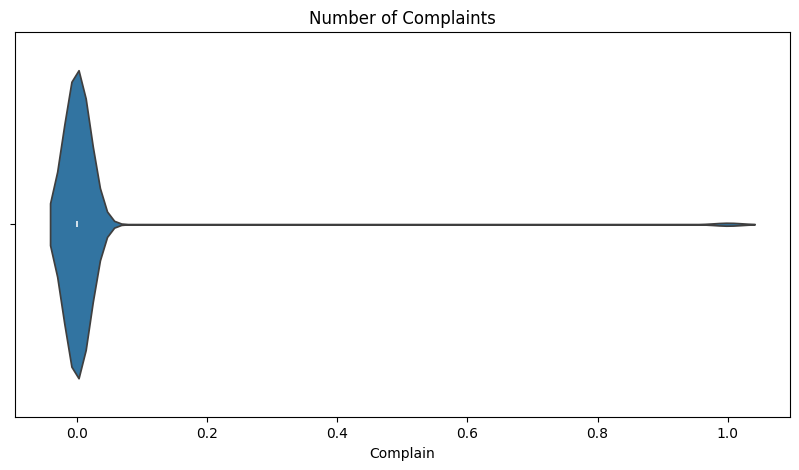

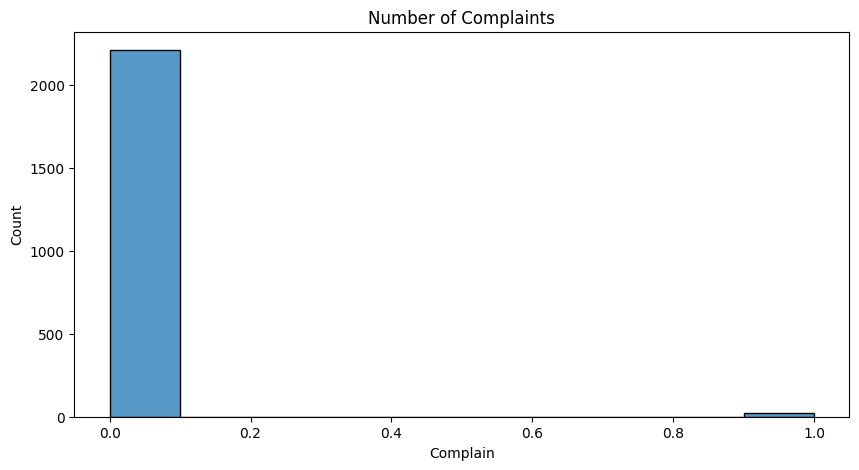


Complaint Frequency including outliers
count    2232.000000
mean        0.009409
std         0.096562
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Complain, dtype: float64


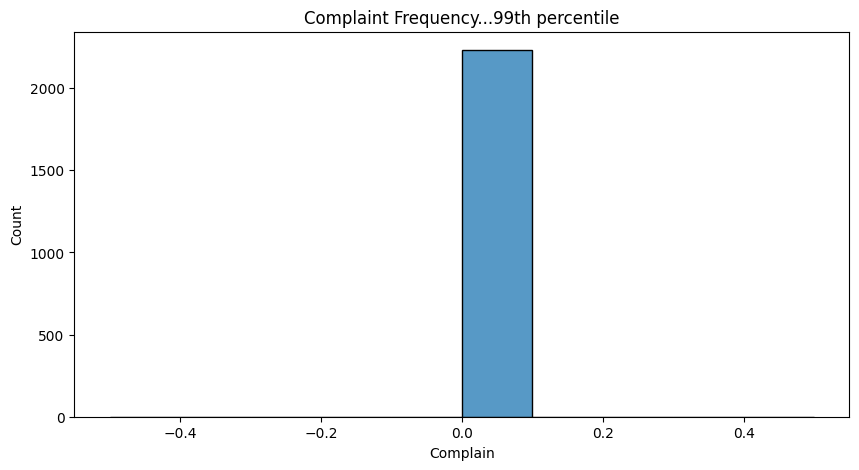

Complaint Frequency after removing outliers
count    2232.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Complain, dtype: float64


In [112]:
# Count number of complaints
mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers['Complain'] = mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers['Complain'].apply(lambda x: 1 if x > 0 else 0)
print('Complaints: ',mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers['Complain'].value_counts())
# Complaint frequency outliers violin plot
plt.figure(figsize=(10,5))
sns.violinplot(x=mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers['Complain'])
plt.title('Number of Complaints')
plt.show()
# Complaint frequency outliers histogram
plt.figure(figsize=(10,5))
sns.histplot(mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers['Complain'],bins=10)
plt.title('Number of Complaints')
plt.show()
print()
#describe the complaint frequency including outliers
print('Complaint Frequency including outliers')
print(mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers['Complain'].describe())
# Complaint Frequency 99th percentile
# remove outliers for complaint frequency
mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_complaint_outliers = mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_outliers.copy()
mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_complaint_outliers['Complain'] = mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_complaint_outliers['Complain'].clip(upper=mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_complaint_outliers['Complain'].quantile(0.99))
# create a plot to see the distriution of the complaint frequency without removing complaint frequency outliers
plt.figure(figsize=(10,5))
sns.histplot(mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_complaint_outliers['Complain'],bins=10)
plt.title('Complaint Frequency...99th percentile')
plt.show()
# describe the complaint frequency after removing outliers
print('Complaint Frequency after removing outliers')
print(mdata_no_income_outliers_no_purchase_or_web_cat_store_us_recency_specific_complaint_outliers['Complain'].describe())


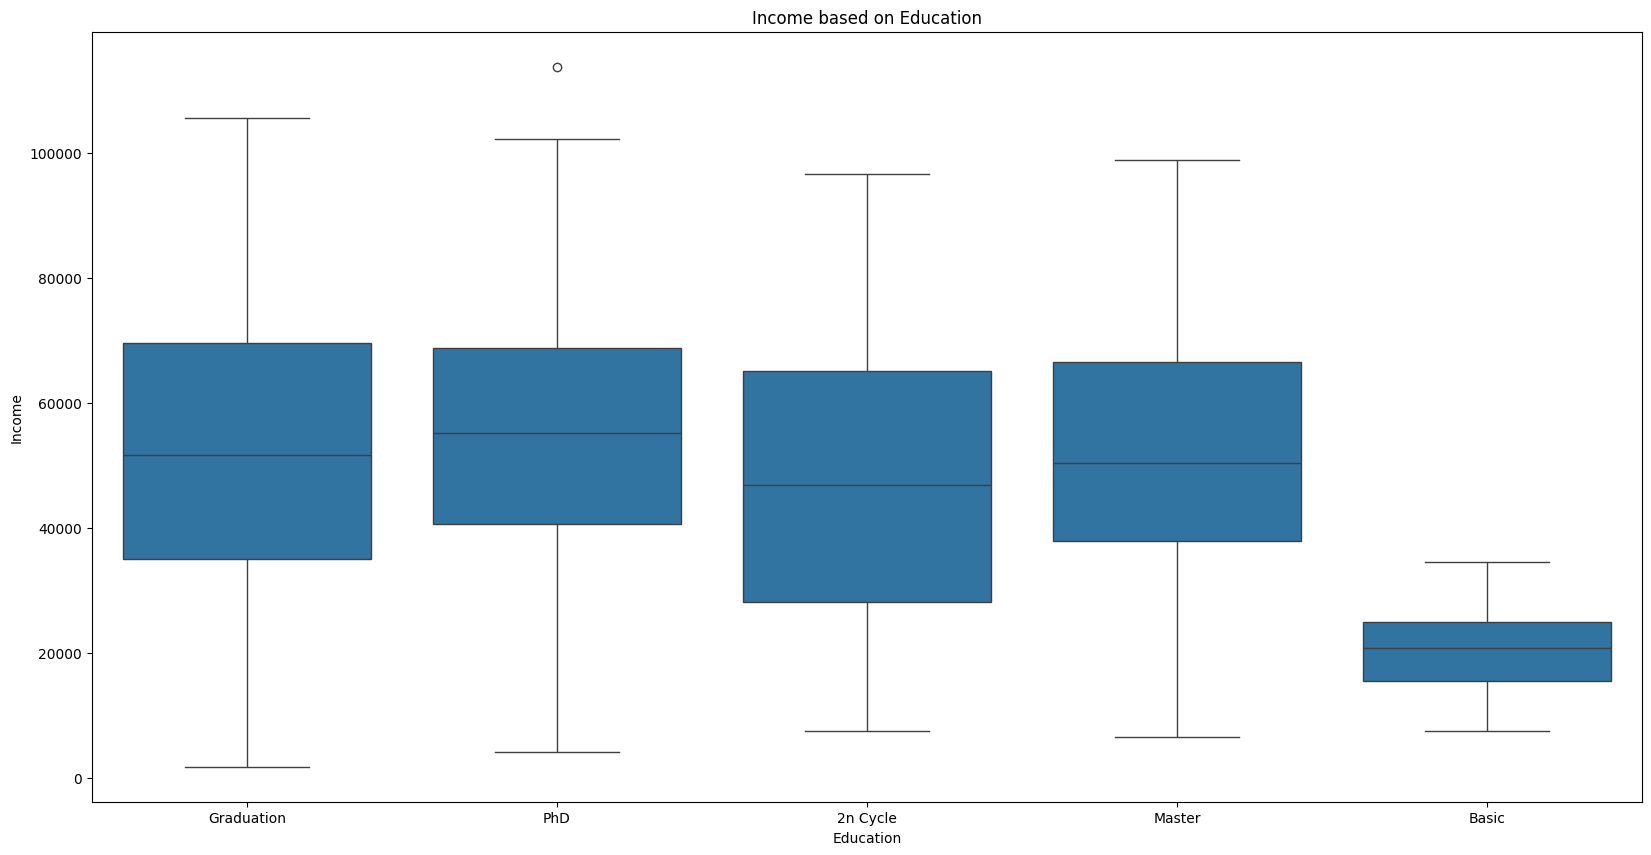

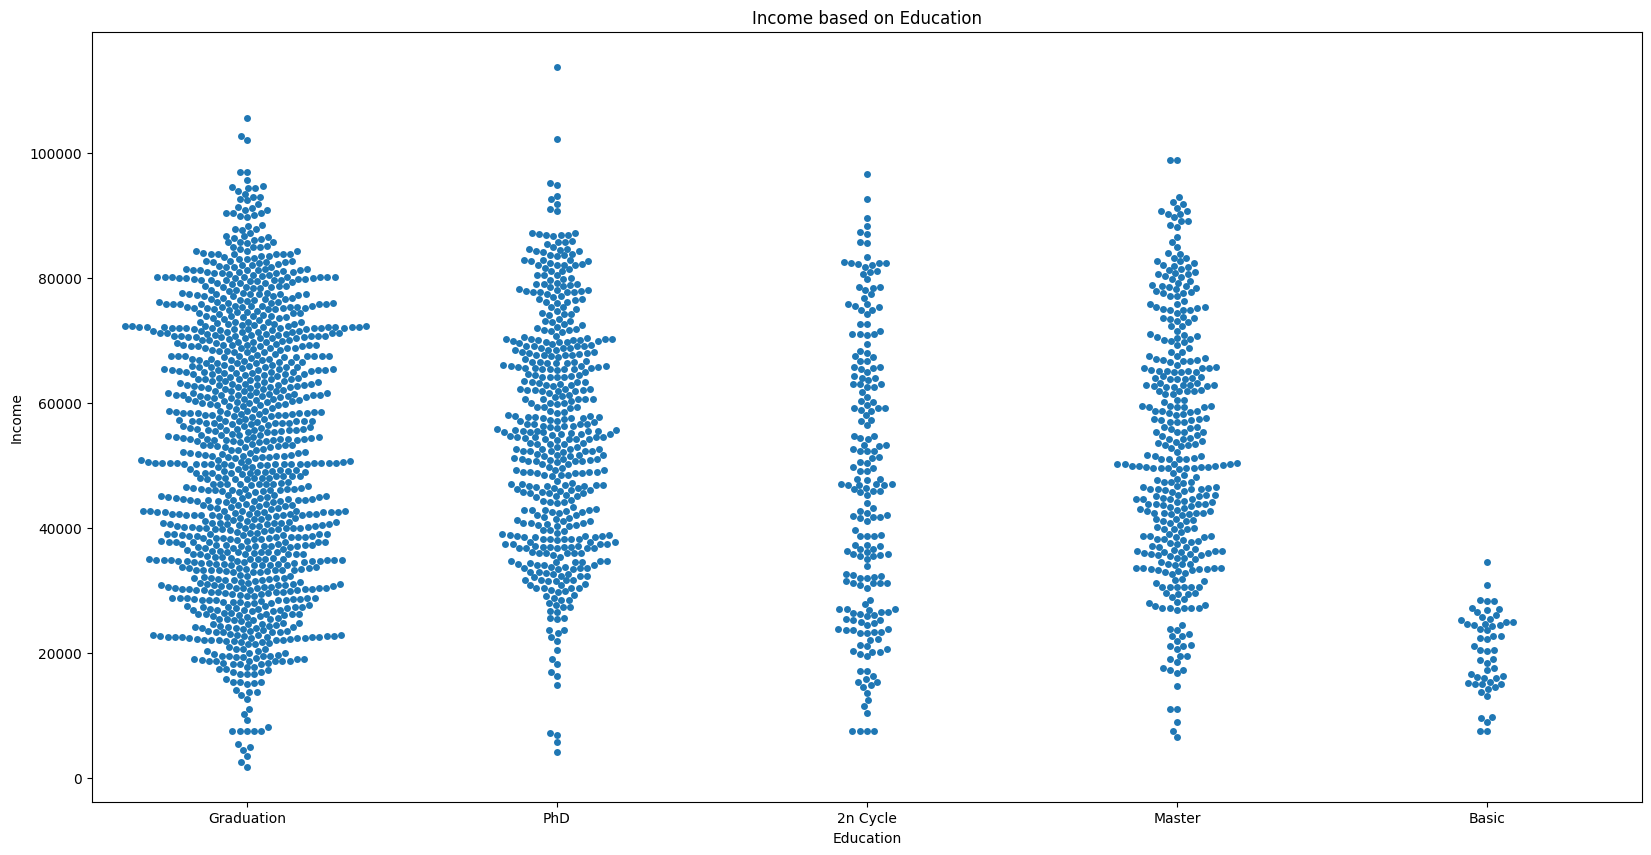

In [113]:
# Income boxplot based on Education
plt.figure(figsize=(20,10))
sns.boxplot(x='Education', y=' Income ', data=mdata_no_income_outliers_no_purchase_or_web_outliers)
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Income based on Education')

# Swarm plot of income based on Education
plt.figure(figsize=(20,10))
sns.swarmplot(x='Education', y=' Income ', data=mdata_no_income_outliers_no_purchase_or_web_outliers)
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Income based on Education')
plt.show()
print()


Text(0.5, 1.0, 'Income based on Marital Status')

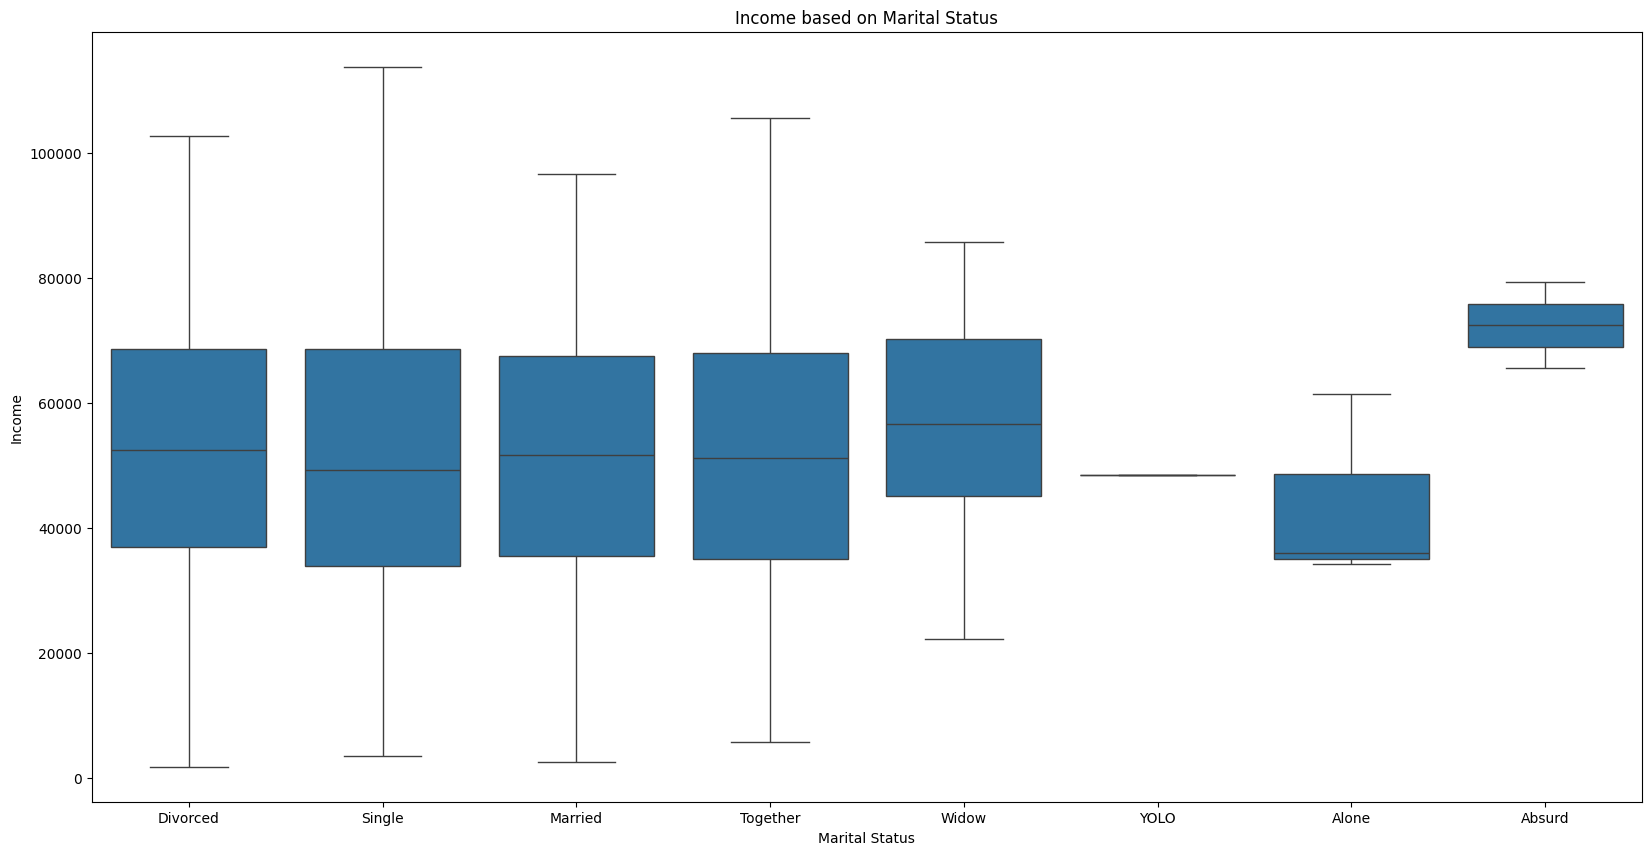

In [114]:
# Income boxplot based on Marital Status
plt.figure(figsize=(20,10))
sns.boxplot(x='Marital_Status', y=' Income ', data=mdata_no_income_outliers_no_purchase_outliers)
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.title('Income based on Marital Status')


Education
2n Cycle      47627.800861
Basic         20306.259259
Graduation    51971.254241
Master        52605.073925
PhD           55277.197951
Name:  Income , dtype: float64

Marital_Status
Absurd      72365.500000
Alone       43789.000000
Divorced    52396.610390
Married     51353.491823
Single      50991.849535
Together    51599.647650
Widow       56443.282468
YOLO        48432.000000
Name:  Income , dtype: float64

Country
AUS    51797.401674
CA     52668.177526
GER    52881.108345
IND    48245.724908
ME     57680.333333
SA     52699.023881
SP     51269.652196
US     52167.005596
Name:  Income , dtype: float64

Kidhome
0    61324.497956
1    38327.109389
2    39760.617777
Name:  Income , dtype: float64

mean of the entire income column:  52235.88796108595


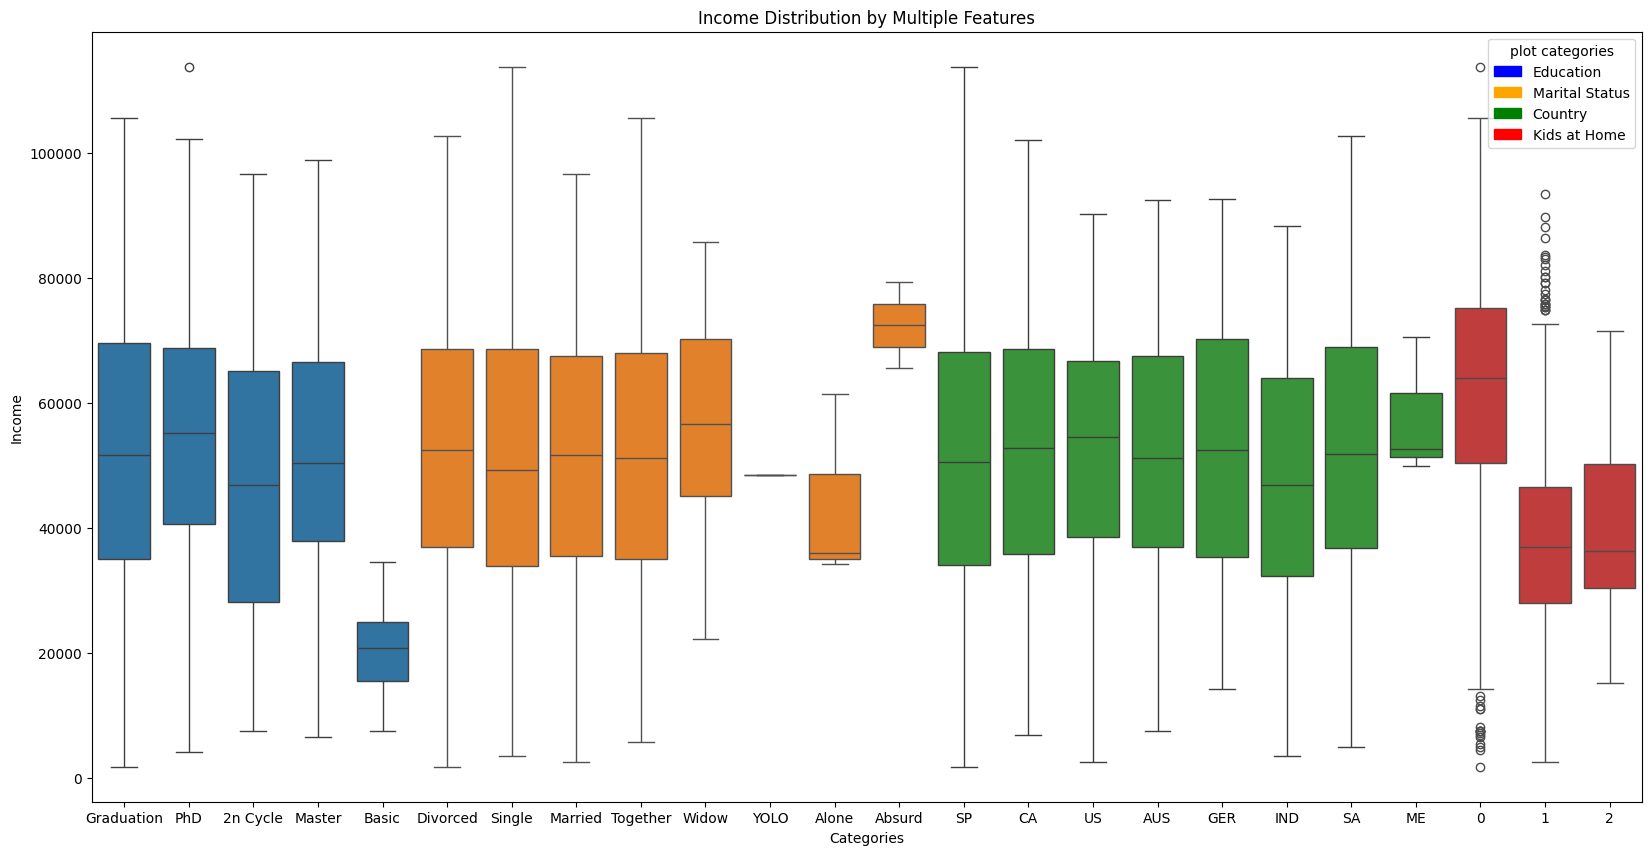

In [115]:
import matplotlib.patches as mpatches
plt.figure(figsize=(20,10))
sns.boxplot(x='Education', y=' Income ', data=mdata_no_income_outliers_no_purchase_or_web_outliers)
sns.boxplot(x='Marital_Status', y=' Income ', data=mdata_no_income_outliers_no_purchase_or_web_outliers)
sns.boxplot(x='Country', y=' Income ', data=mdata_no_income_outliers_no_purchase_or_web_outliers)
sns.boxplot(x='Kidhome', y=' Income ', data=mdata_no_income_outliers_no_purchase_or_web_outliers)
# Set the titles and labels
plt.xlabel('Categories')
plt.ylabel('Income')
plt.title('Income Distribution by Multiple Features')
# Create custom legend patches
legend_patches = [
    mpatches.Patch(color='blue', label='Education'),
    mpatches.Patch(color='orange', label='Marital Status'),
    mpatches.Patch(color='green', label='Country'),
    mpatches.Patch(color='red', label='Kids at Home')
]

# Add the custom legend
plt.legend(handles=legend_patches, loc='upper right', title='plot categories')

# print mean for each category
print(mdata_no_income_outliers_no_purchase_or_web_outliers.groupby('Education')[' Income '].mean())
print()
print(mdata_no_income_outliers_no_purchase_or_web_outliers.groupby('Marital_Status')[' Income '].mean())
print()
print(mdata_no_income_outliers_no_purchase_or_web_outliers.groupby('Country')[' Income '].mean())
print()
print(mdata_no_income_outliers_no_purchase_or_web_outliers.groupby('Kidhome')[' Income '].mean())
print()
# print the mean for the entire income column
print('mean of the entire income column: ',mdata[' Income '].mean())



In [116]:
#!pip install scikit-learn
# We'll Use ordinal encoding and one hot encoding according to different types of categorical variables.
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Columns for ordinal encoding
ordinal_cols = ['Education']

# Columns for one-hot encoding
onehot_cols = ['Marital_Status', 'Country']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_cols),
        ('onehot', OneHotEncoder(), onehot_cols)
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Fit and transform the data
mdata_encoded = preprocessor.fit_transform(mdata_no_income_outliers_no_purchase_or_web_outliers)

# Convert the transformed data back to a DataFrame
# Get feature names for the transformed data
ordinal_feature_names = ordinal_cols
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)
other_feature_names = [col for col in mdata_no_income_outliers_no_purchase_or_web_outliers.columns if col not in ordinal_cols + onehot_cols]

# Concatenate all feature names
feature_names = list(ordinal_feature_names) + list(onehot_feature_names) + other_feature_names

# Create a DataFrame with the transformed data
mdata_encoded_df = pd.DataFrame(mdata_encoded, columns=feature_names)

#Show the first few rows
print(mdata_encoded_df.head())

print(mdata_encoded_df.columns)

  Education Marital_Status_Absurd Marital_Status_Alone  \
0       2.0                   0.0                  0.0   
1       2.0                   0.0                  0.0   
2       2.0                   0.0                  0.0   
3       2.0                   0.0                  0.0   
4       2.0                   0.0                  0.0   

  Marital_Status_Divorced Marital_Status_Married Marital_Status_Single  \
0                     1.0                    0.0                   0.0   
1                     0.0                    0.0                   1.0   
2                     0.0                    1.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    0.0                   1.0   

  Marital_Status_Together Marital_Status_Widow Marital_Status_YOLO  \
0                     0.0                  0.0                 0.0   
1                     0.0                  0.0                 0.0